In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data= "/content/drive/MyDrive/Project/data/clean_df.csv"

In [ ]:
df= pd.read_csv(data)

In [ ]:
# Drop the 'Treatment_Outcome_Date' and 'DateOf_TB_Treatment_Initiation' columns from the DataFrame
df = df.drop(columns=['Treatment_Outcome_Date', 'DateOf_TB_Treatment_Initiation','UserID_Enrollment'])


In [ ]:
import pandas as pd

# Assuming 'KeyPopulation' is the column with comma-separated values
df['KeyPopulation'] = df['KeyPopulation'].astype(str).str.split(',')

# Create a set of unique categories across all rows
all_categories = set(category for categories in df['KeyPopulation'] for category in categories)

# Create multi-hot encoding for each unique category
encoded_columns = []
for category in all_categories:
    df[category] = df['KeyPopulation'].apply(lambda x: category in x).astype(int)
    encoded_columns.append(category)

# Drop the original 'KeyPopulation' column
df = df.drop('KeyPopulation', axis=1)

# Names of the new columns created by multi-hot encoding
new_column_names = encoded_columns
print("New column names:", new_column_names)


New column names: ['Cardiovascular Disorder', 'Palliative Care', 'Cancer', 'Refugee', 'Patient on immunosuppressants', 'Transplantation', 'Tobacco', 'Bronchial Asthma', 'COPD', 'Renal Impairment', 'Not Applicable', 'Migrant', 'Unknown', 'Urban Slum', 'Anti-TNF treatment', 'Prison', 'Diabetes', 'Liver Impairment', 'Miner', 'Hypertensive', 'Contact of Known TB Patients', 'Pregnancy', 'Dialysis', 'COVID recovered patients', 'Health Care Worker', 'Silicosis', 'Lactating mother', 'Other']


In [ ]:
# Assuming new_column_names contains the names of the new columns created by multi-hot encoding
column_frequencies = df[encoded_columns].sum()
top_columns = column_frequencies.nlargest(9).index

# Names of the top 9 columns with highest frequency
top_9_columns = list(top_columns)
print("Top 9 columns:", top_9_columns)


Top 9 columns: ['Not Applicable', 'Other', 'Tobacco', 'Urban Slum', 'Diabetes', 'Contact of Known TB Patients', 'Bronchial Asthma', 'Migrant', 'Health Care Worker']


In [ ]:
# Drop the columns that were created by multi-hot encoding and are not in the top 9
columns_to_drop = set(new_column_names) - set(top_columns)
df = df.drop(columns=list(columns_to_drop))


In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.3 MB/s eta 0:00:00


In [ ]:
df.columns

Index(['DiagnosingFacilityState', 'DiagnosingFacilityDistrict',
       'DiagnosingFacilityTBU', 'DiagnosingFacilityPHI',
       'DiagnosingFacilityPHIType', 'Patient_Status', 'Age', 'Gender',
       'Weight', 'HIV_Status', 'DiabetesStatus', 'basisOfDiagnosis_TestName',
       'CurrentFacilityDistrict', 'CurrentFacilityTBU', 'CurrentFacilityPHI',
       'CurrentFacilityPHIType', 'TypeOfCase', 'SiteOfDisease', 'EPSite',
       'BankDetailsAdded', 'FollowupDone_Count', 'ContactTracing_Done',
       'Current Health Facility Sector', 'Diagnosis Health Facility Sector',
       'BasisOfDiagnosis', 'RBS', 'CurrentTobaccoUser', 'HO_AlcoholIntake',
       'Covid19Status', 'PregnancyStatus', 'State_of_TB', 'Migrant', 'Other',
       'Urban Slum', 'Bronchial Asthma', 'Tobacco',
       'Contact of Known TB Patients', 'Not Applicable', 'Health Care Worker',
       'Diabetes'],
      dtype='object')

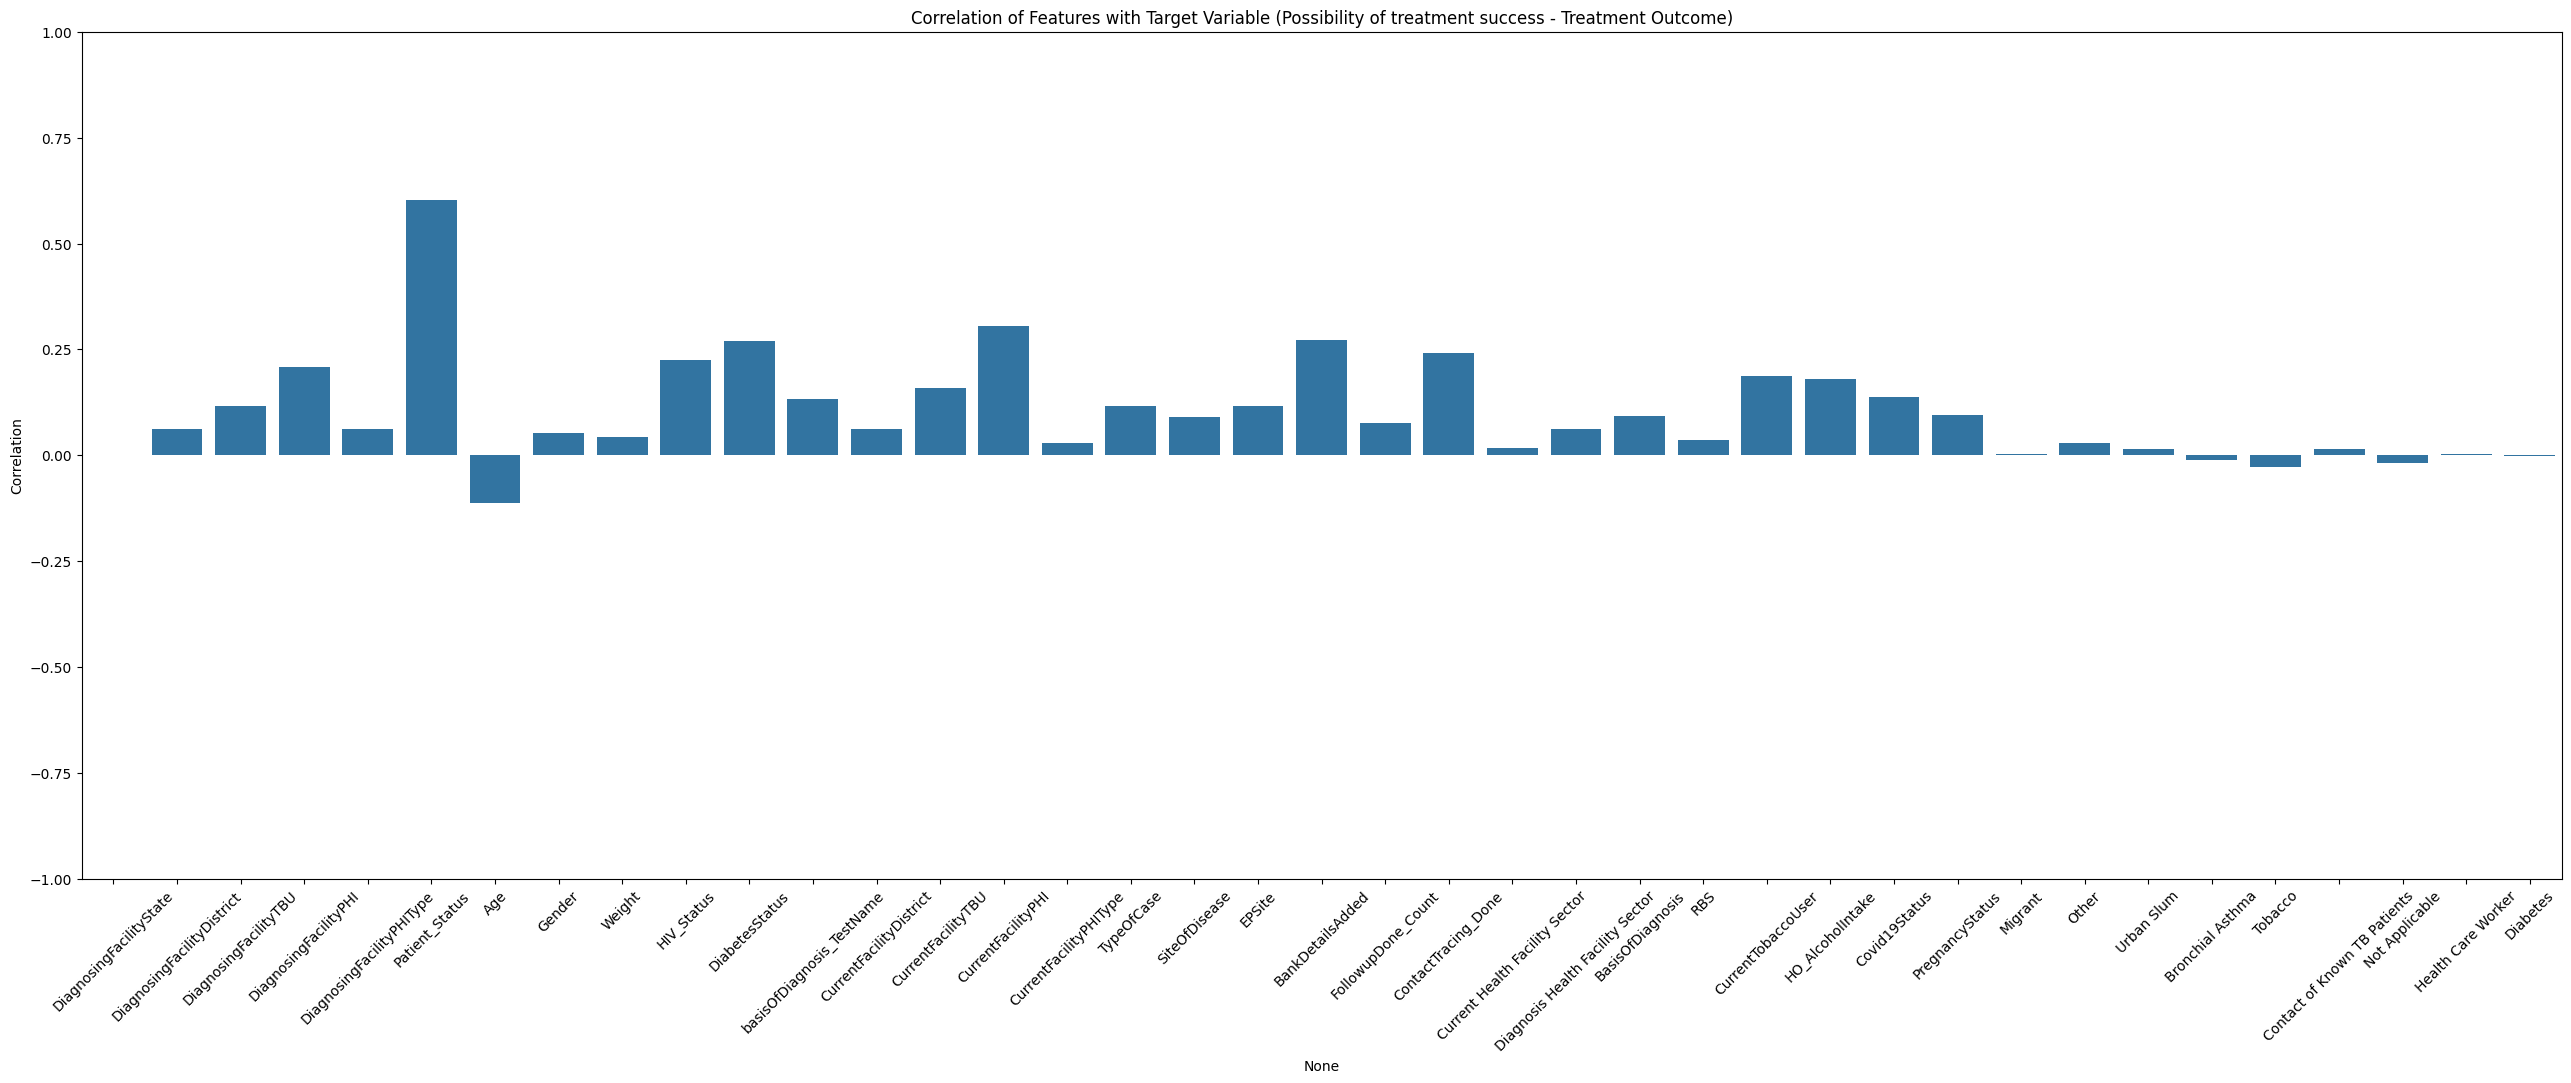

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import TargetEncoder

# Assuming 'df' is your DataFrame and it's already defined

# Initialize the target encoder
encoder = TargetEncoder()

# Fit and transform the data for all columns
df_encoded = df.copy()
df_encoded = encoder.fit_transform(df_encoded, df['State_of_TB'])  # Specify the target variable

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Extract correlations of features with the target variable
target_column = 'State_of_TB'
correlations = correlation_matrix[target_column].drop(target_column)

# Plot the bar graph
plt.figure(figsize=(32, 11))
sns.barplot(x=correlations.index, y=correlations.values)
plt.ylim(-1, 1)  # Set y-axis range from -1 to 1
plt.title('Correlation of Features with Target Variable (Possibility of treatment success - Treatment Outcome)')
plt.ylabel('Correlation')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import TargetEncoder

# Assuming 'df' is your DataFrame and it's already defined

# Define the columns to be target encoded
columns_of_interest = ['CurrentFacilityDistrict', 'TypeOfCase', 'BasisOfDiagnosis', 'SiteOfDisease', 'CurrentTobaccoUser', 'HO_AlcoholIntake']

# Initialize the target encoder
encoder = TargetEncoder()

# Fit and transform the data
df_encoded = df.copy()
df_encoded[columns_of_interest] = encoder.fit_transform(df[columns_of_interest], df['State_of_TB'])

# Compute Pearson Correlation Matrix
pearson_corr = df_encoded[columns_of_interest].corr(method='pearson')

# Compute Spearman's Rank Correlation Matrix
spearman_corr = df_encoded[columns_of_interest].corr(method='spearman')

# Compute Kendall's Tau Correlation Matrix
kendall_corr = df_encoded[columns_of_interest].corr(method='kendall')

# Visualize Pearson Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Pearson Correlation Matrix')
plt.show()

# Visualize Spearman's Rank Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', center=0)
plt.title("Spearman's Rank Correlation Matrix")
plt.show()

# Visualize Kendall's Tau Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', center=0)
plt.title("Kendall's Tau Correlation Matrix")
plt.show()


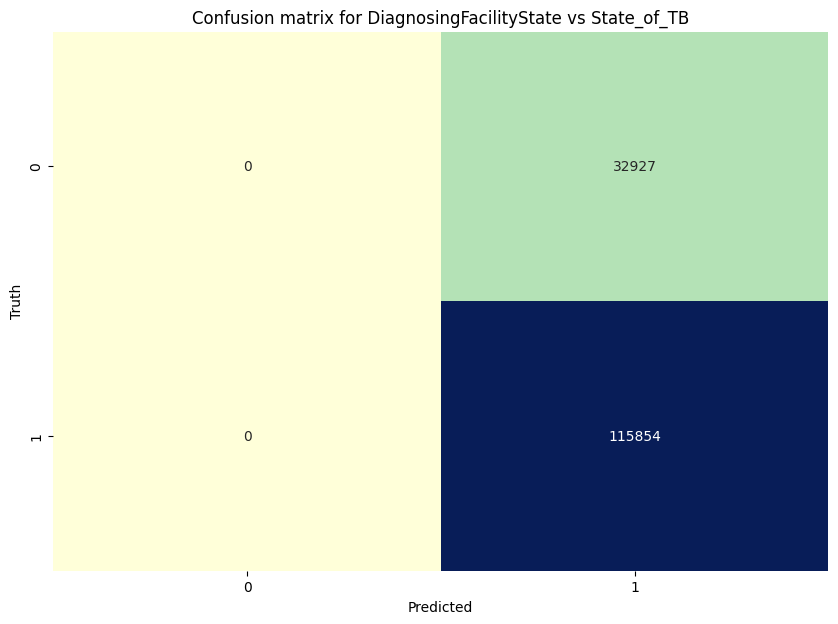

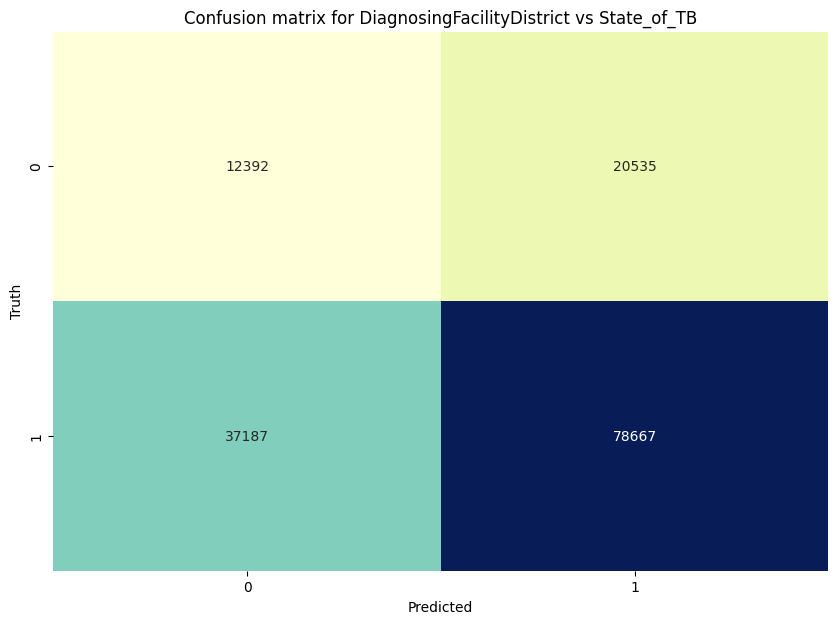

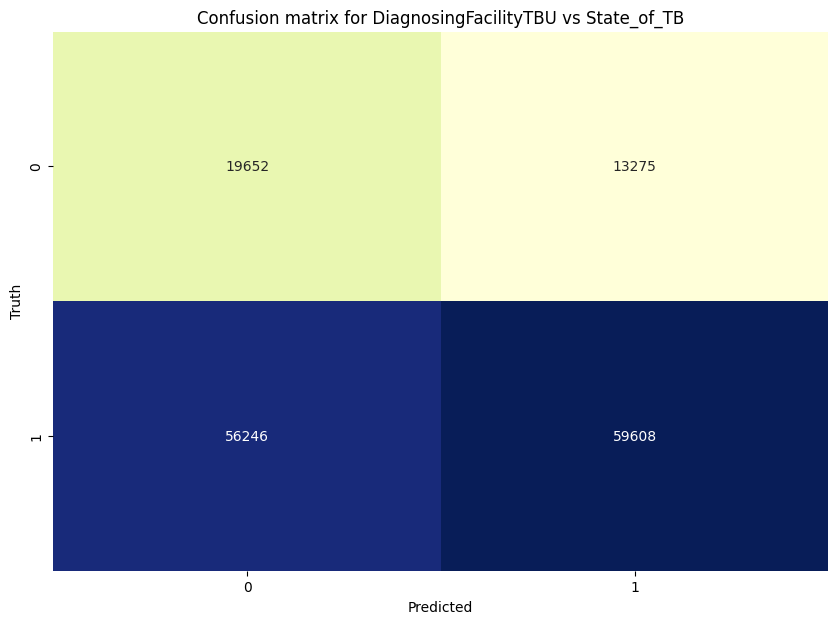

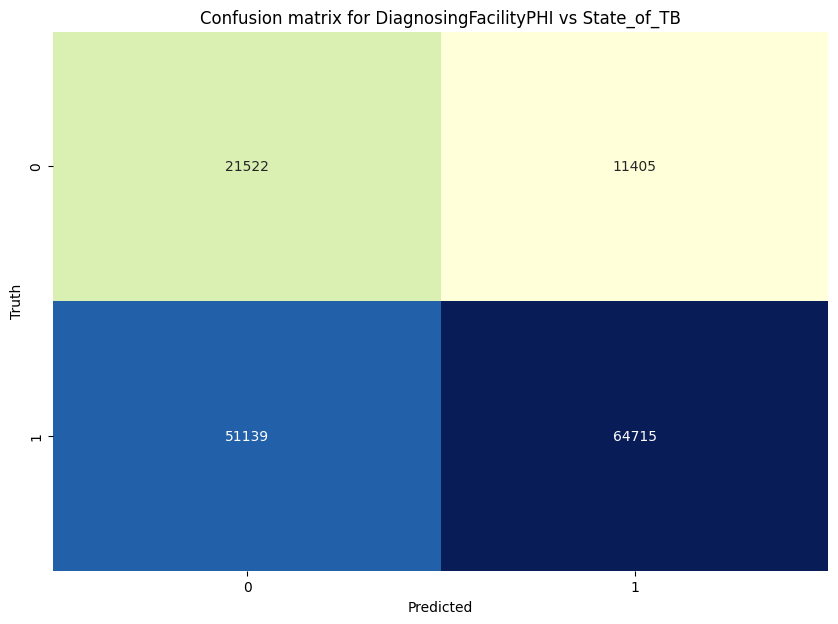

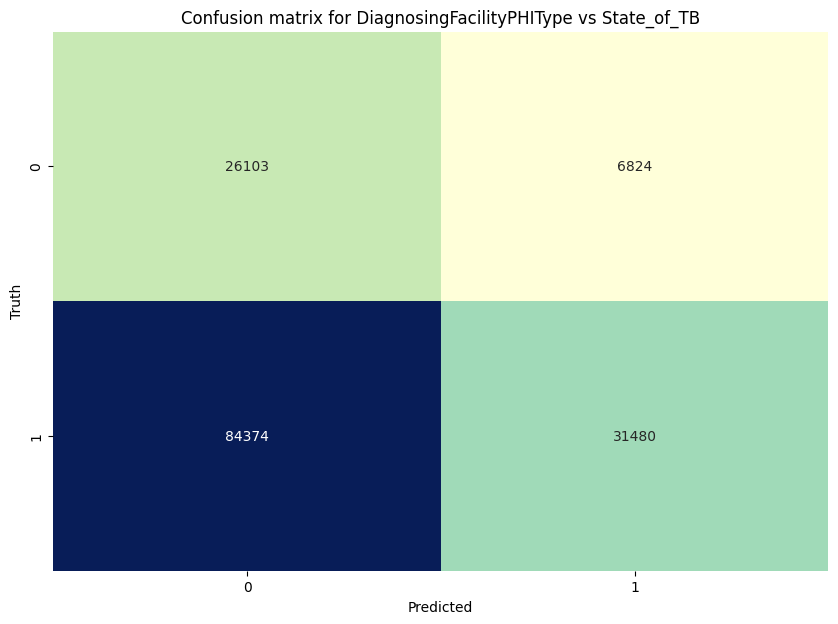

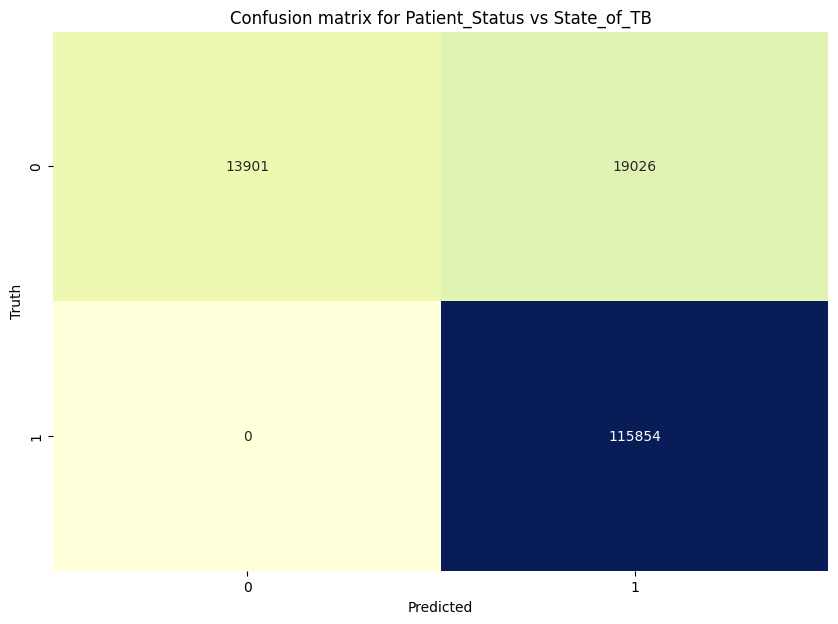

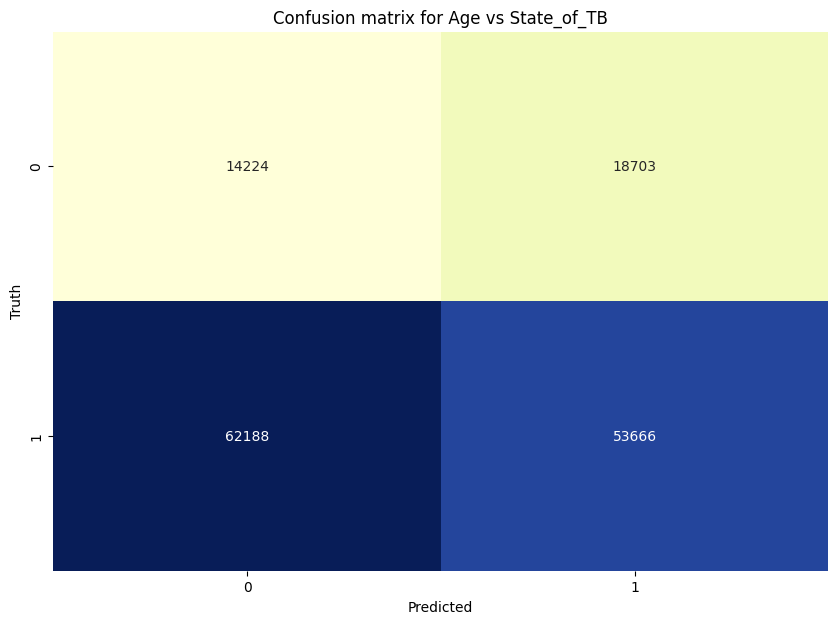

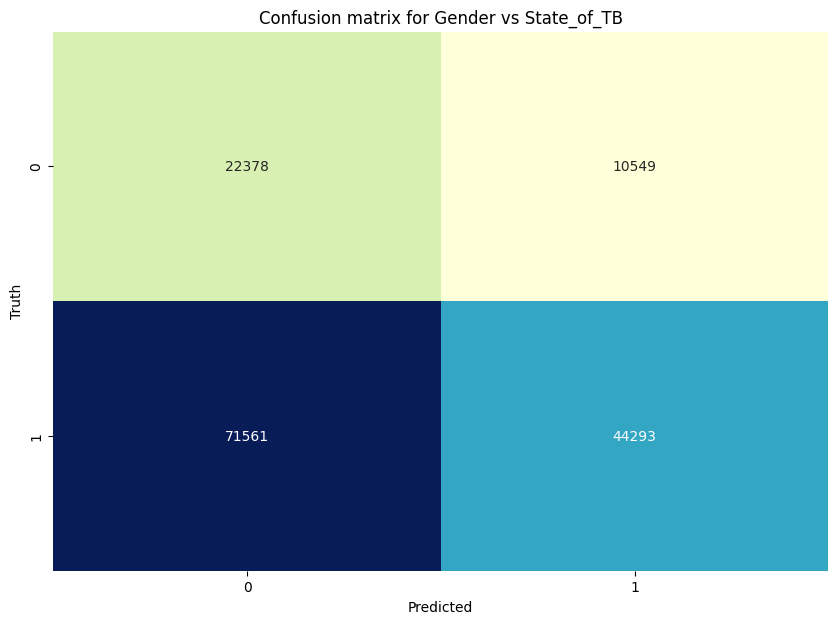

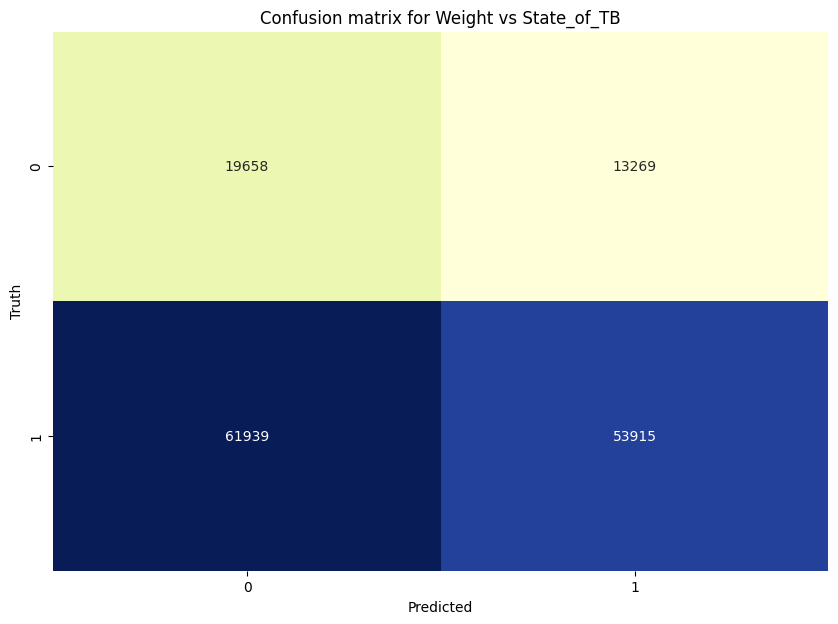

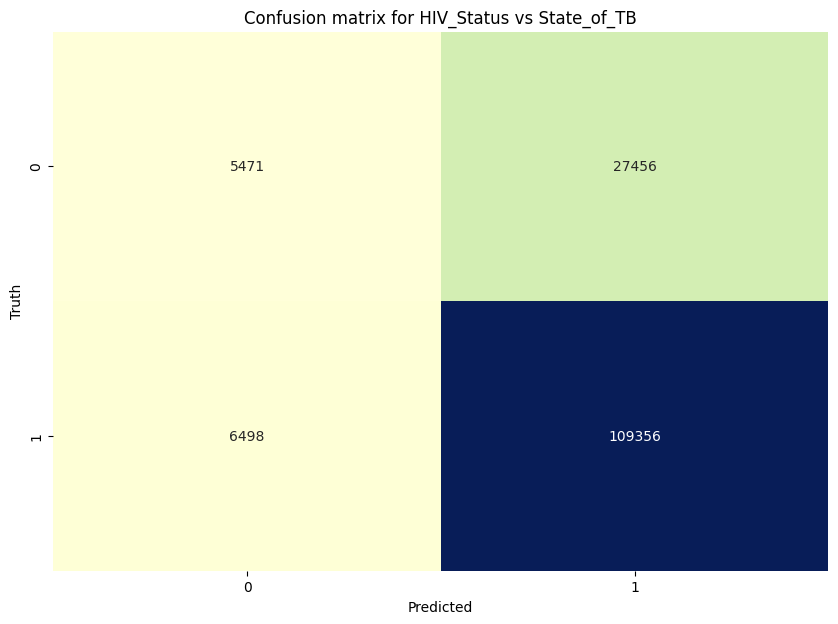

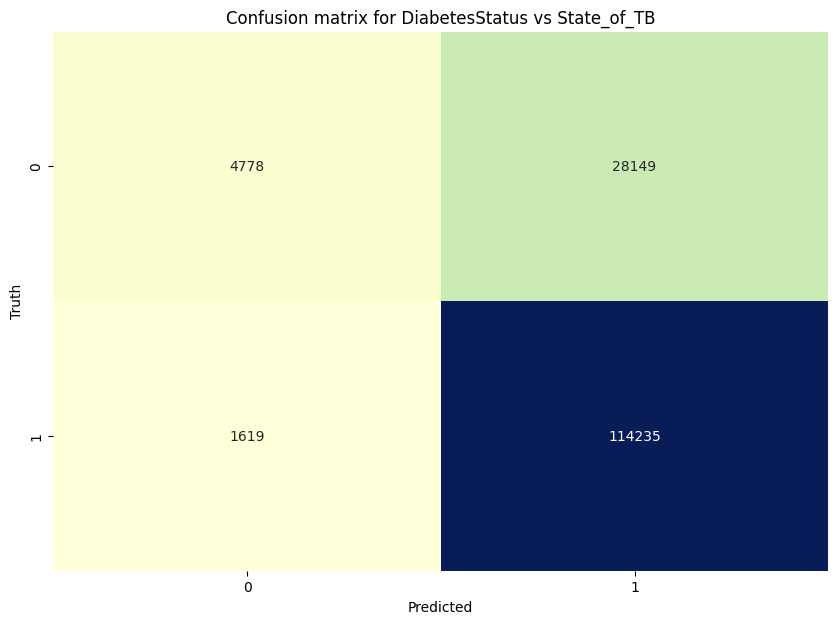

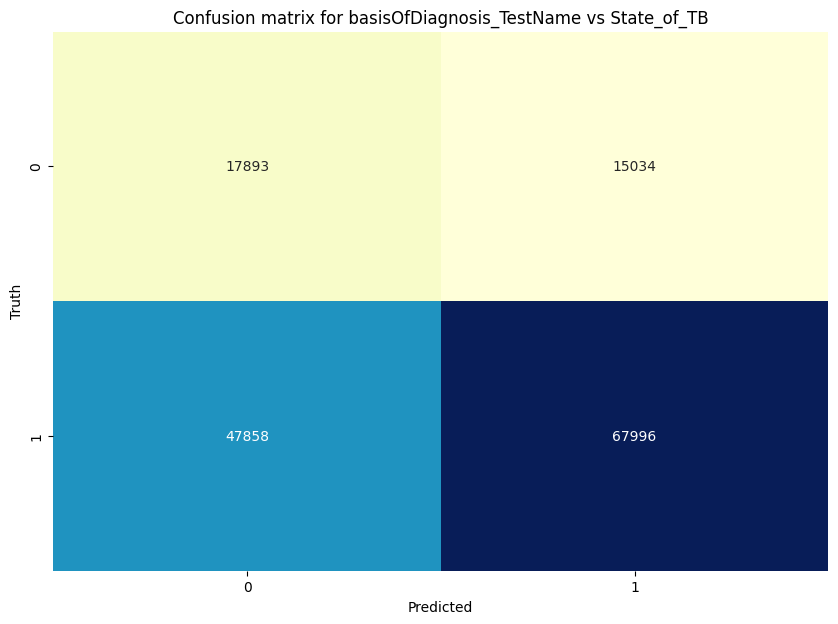

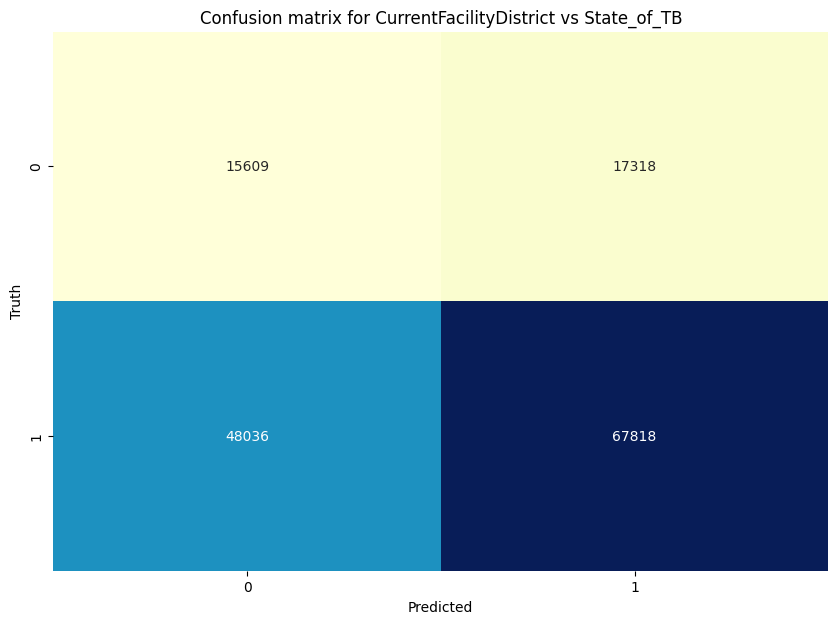

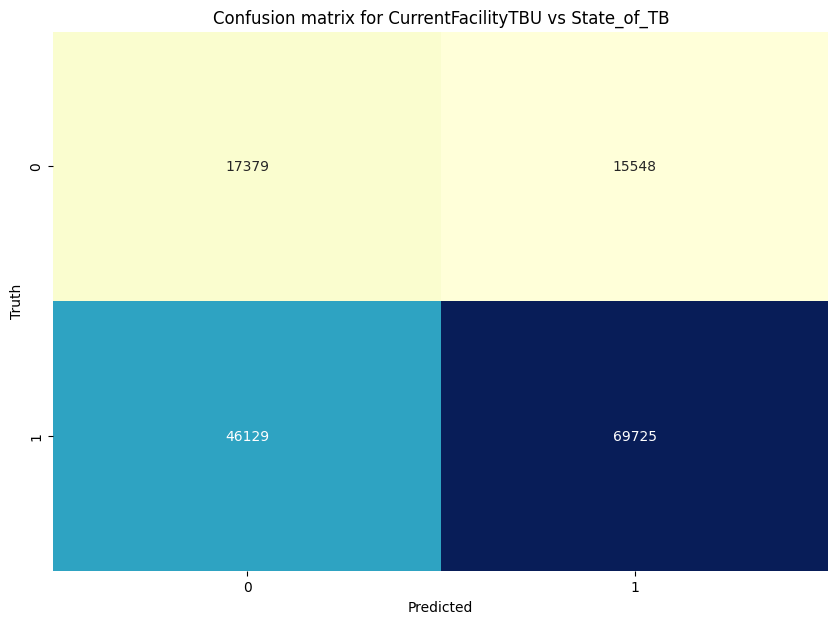

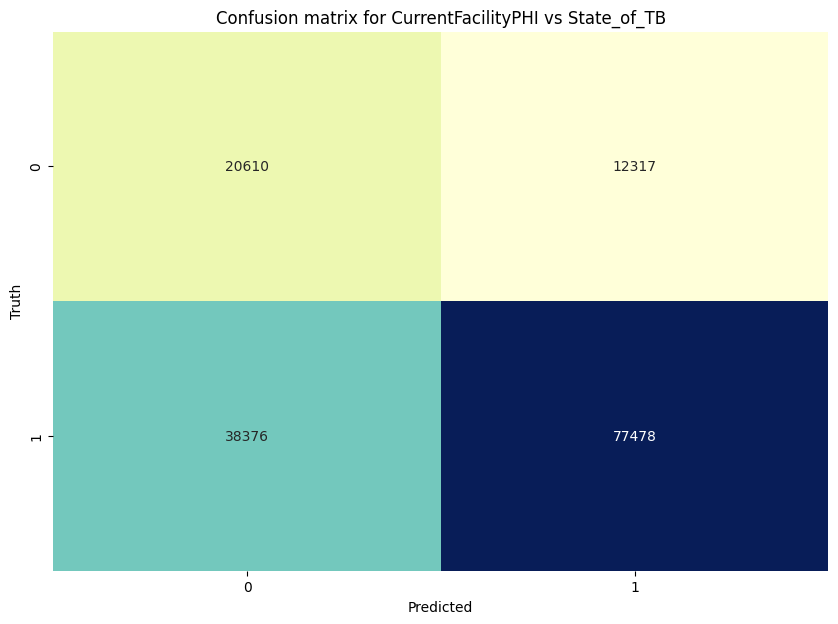

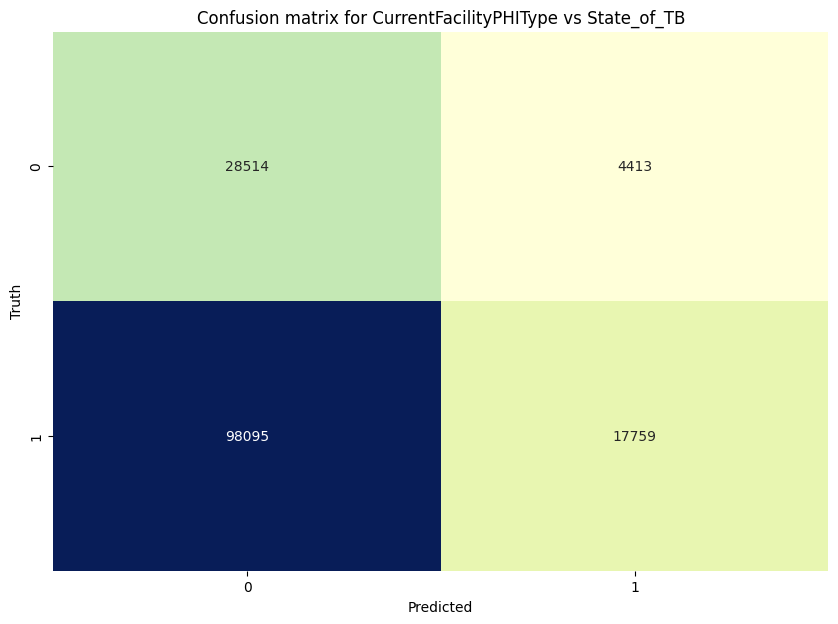

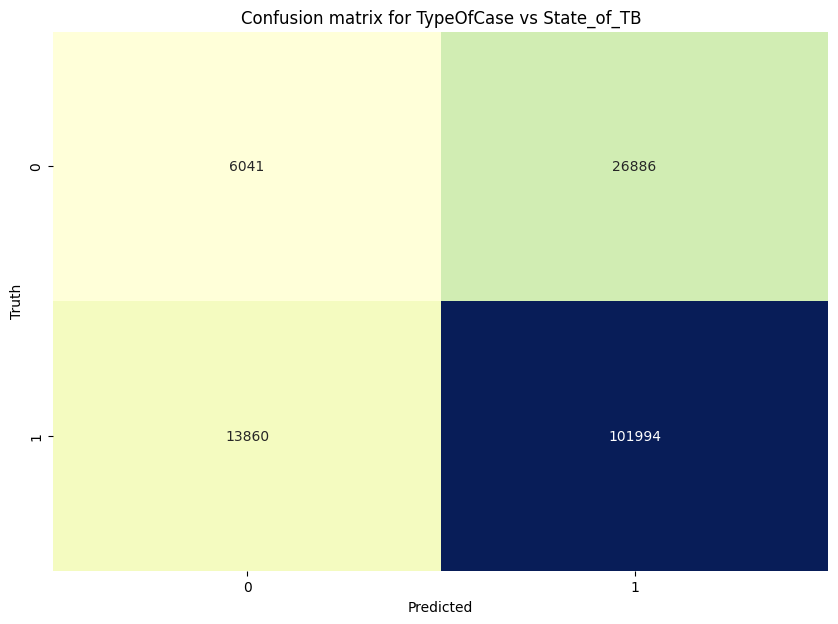

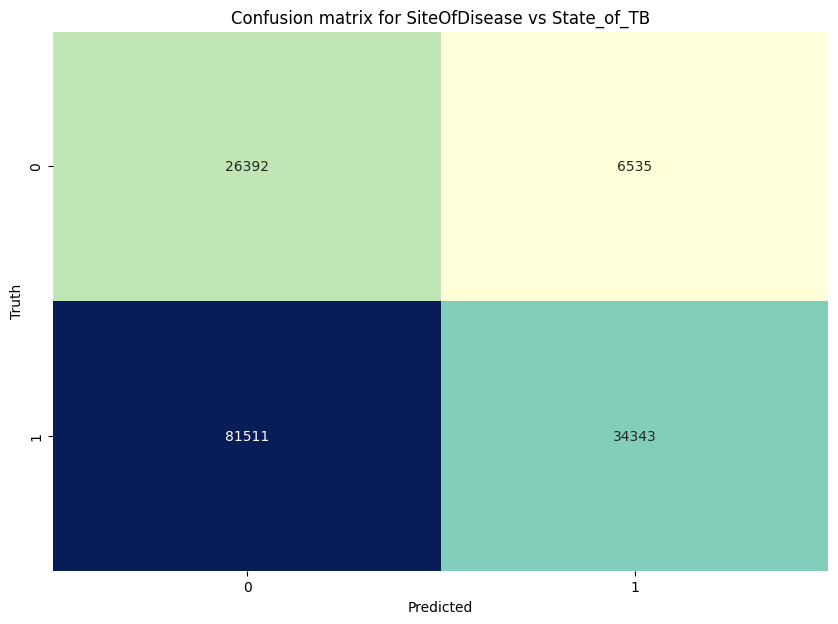

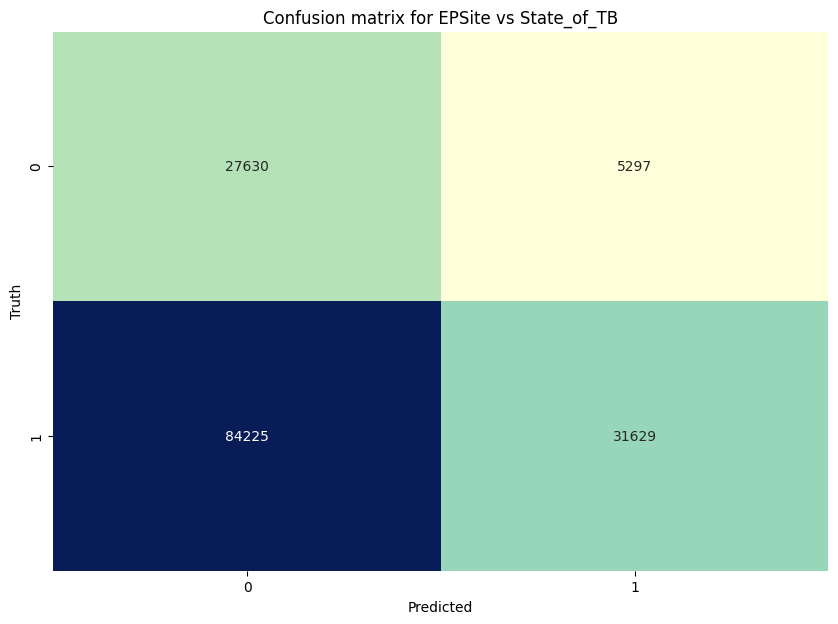

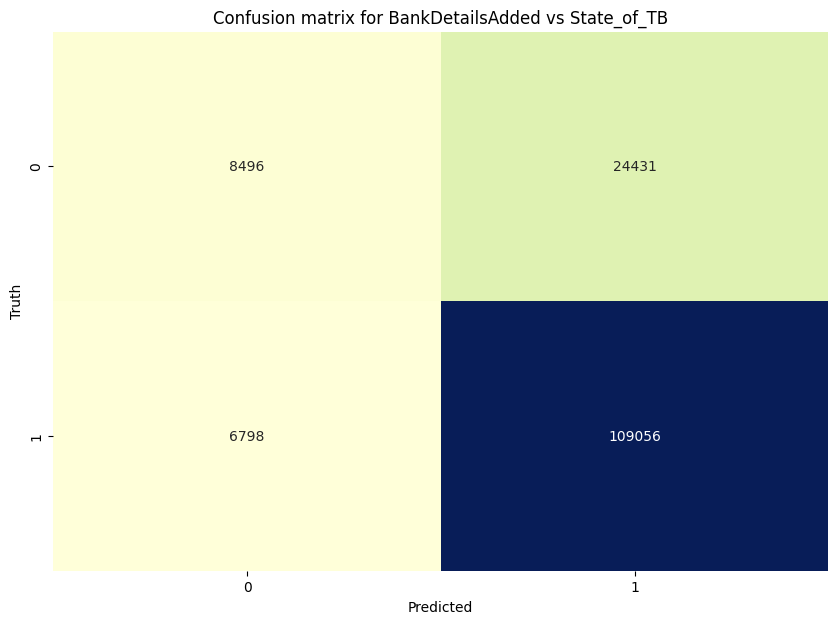

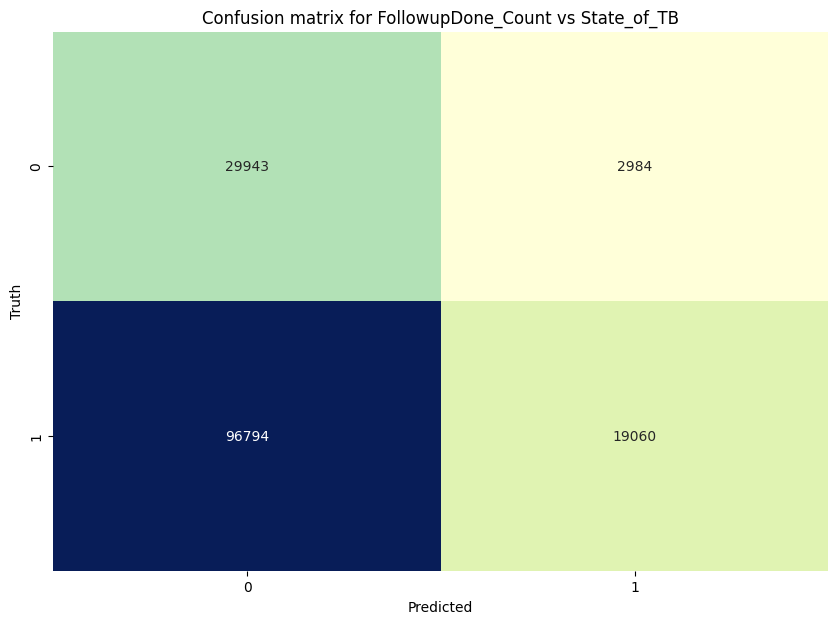

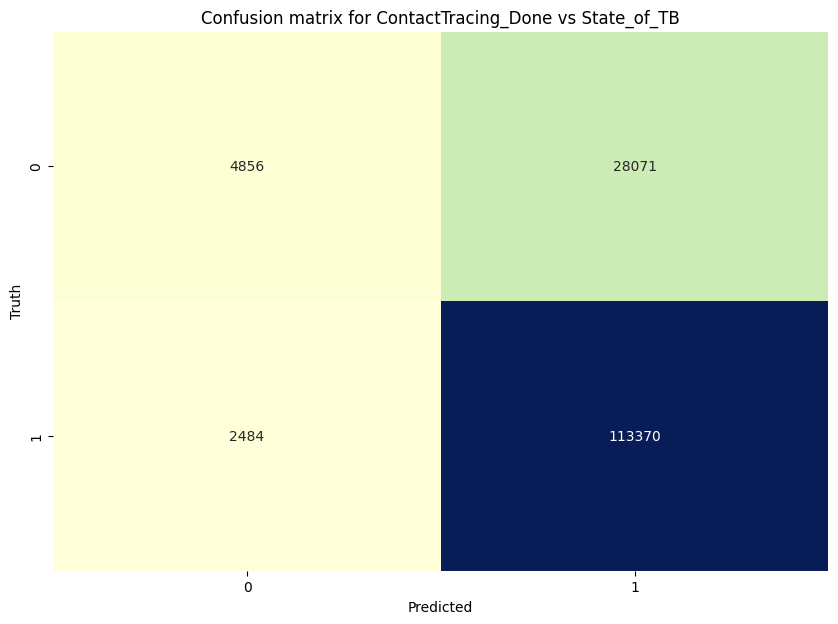

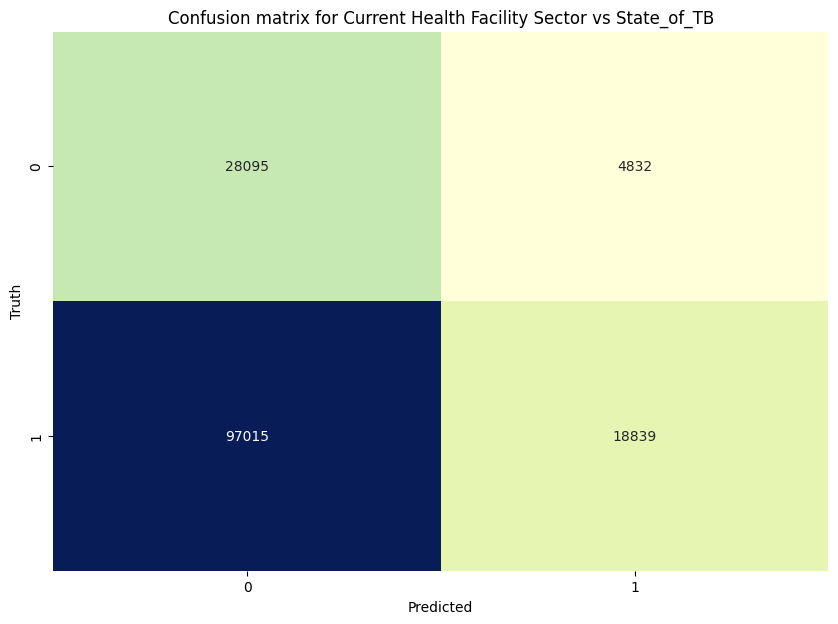

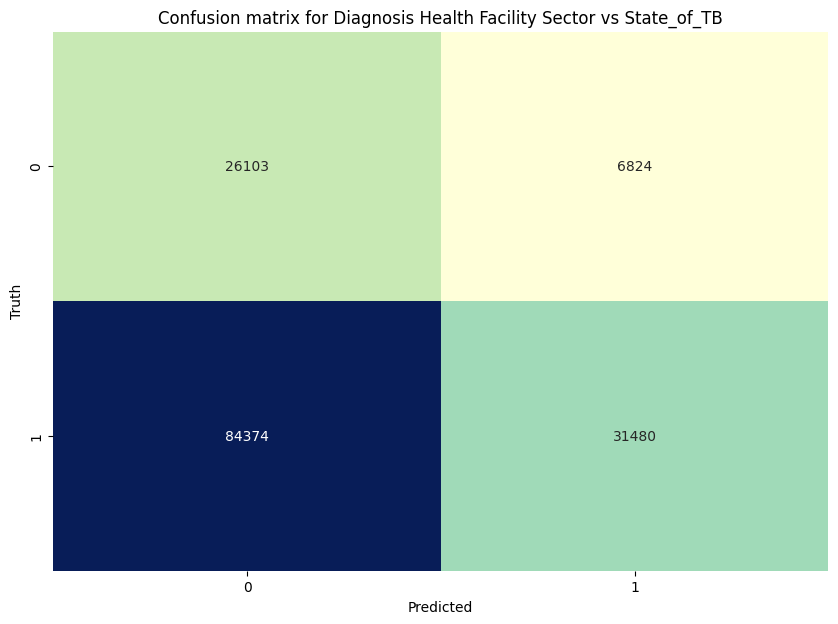

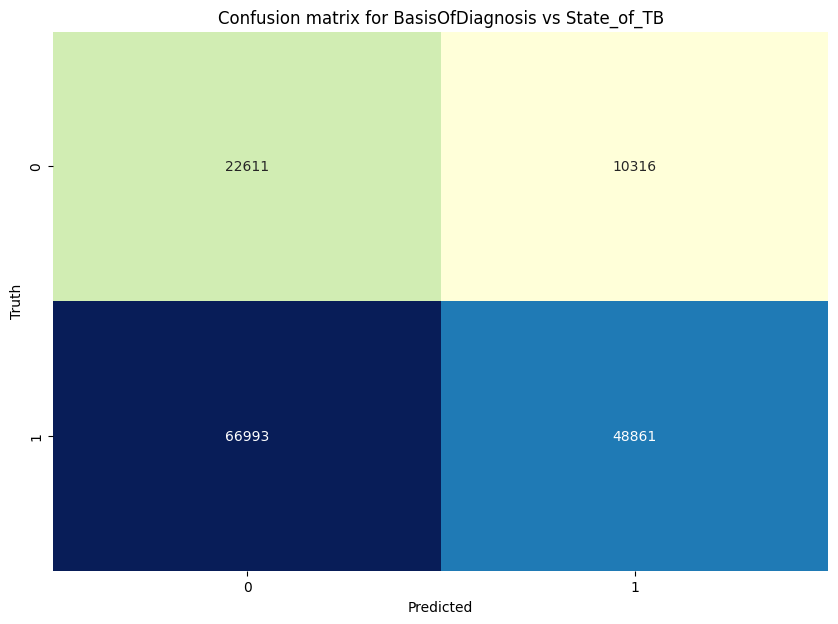

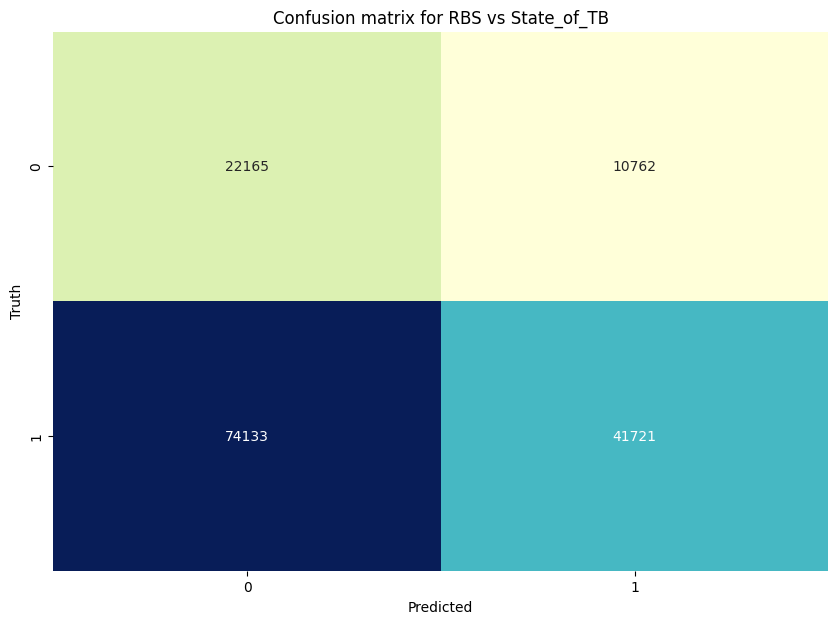

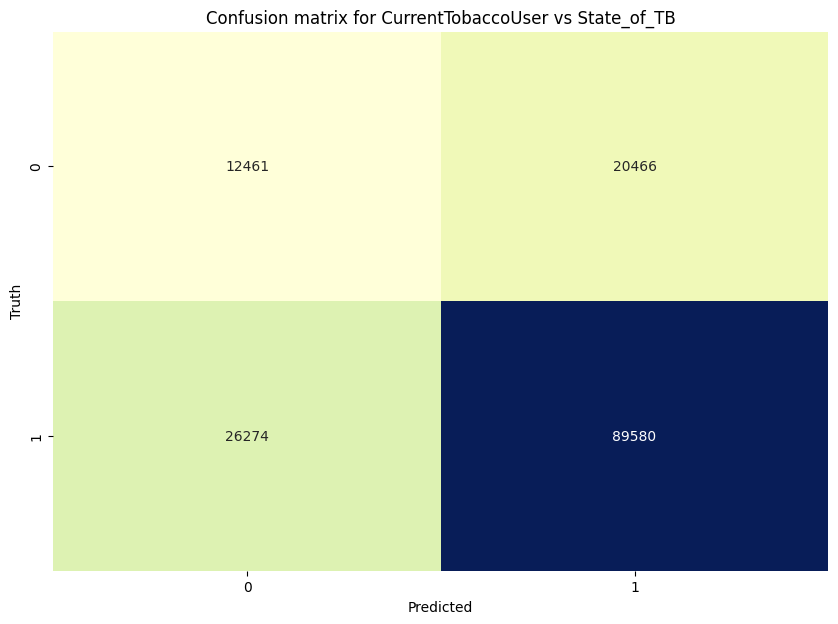

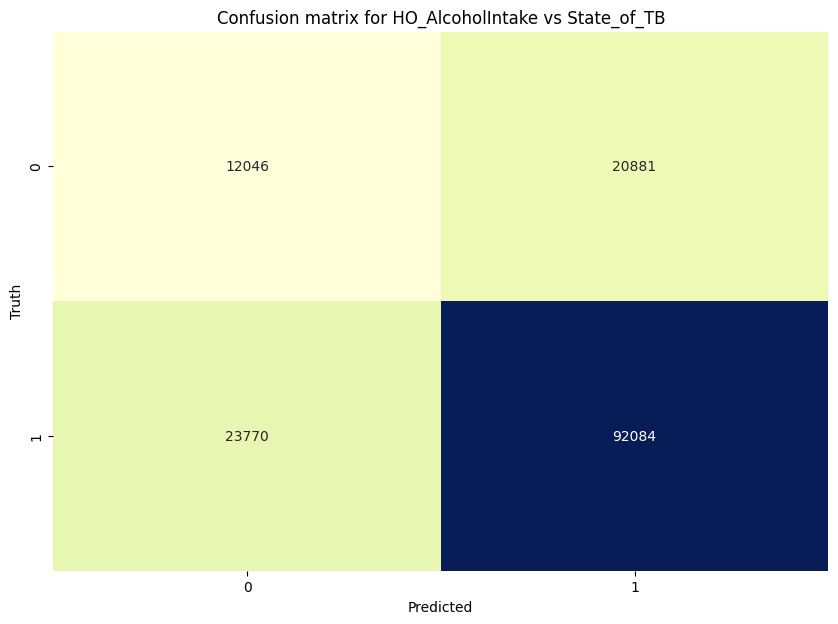

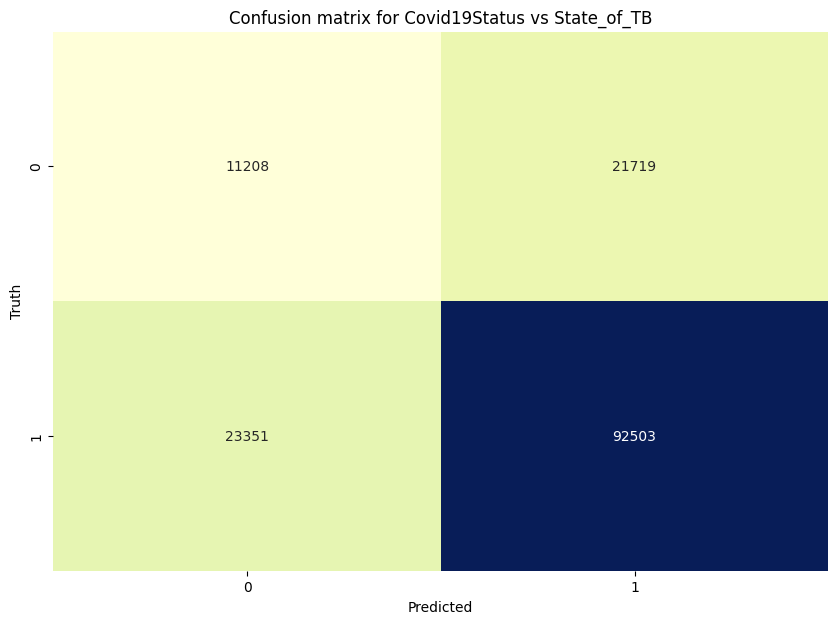

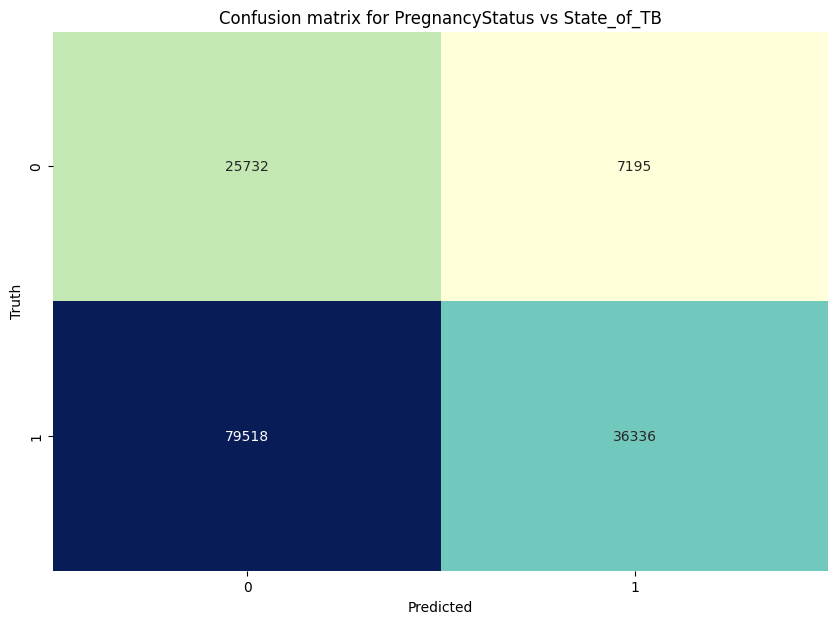

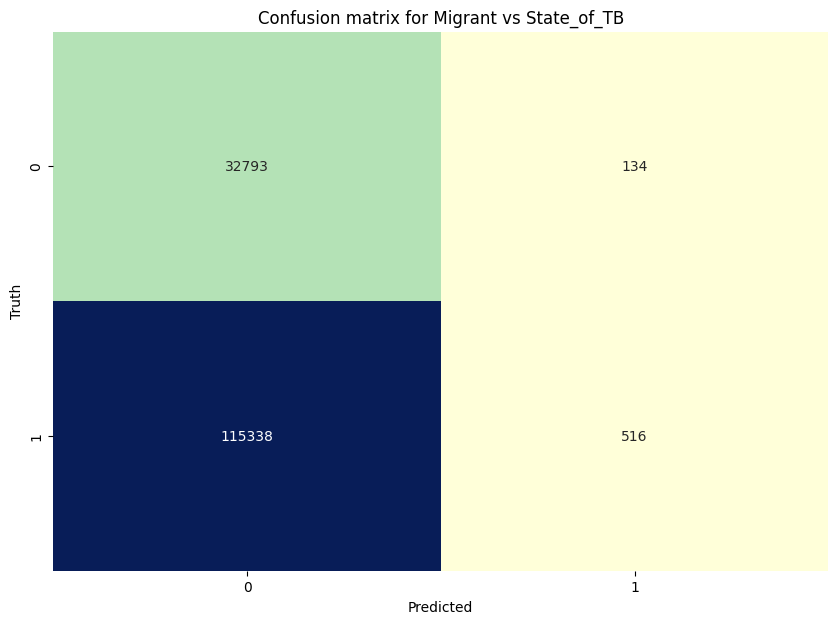

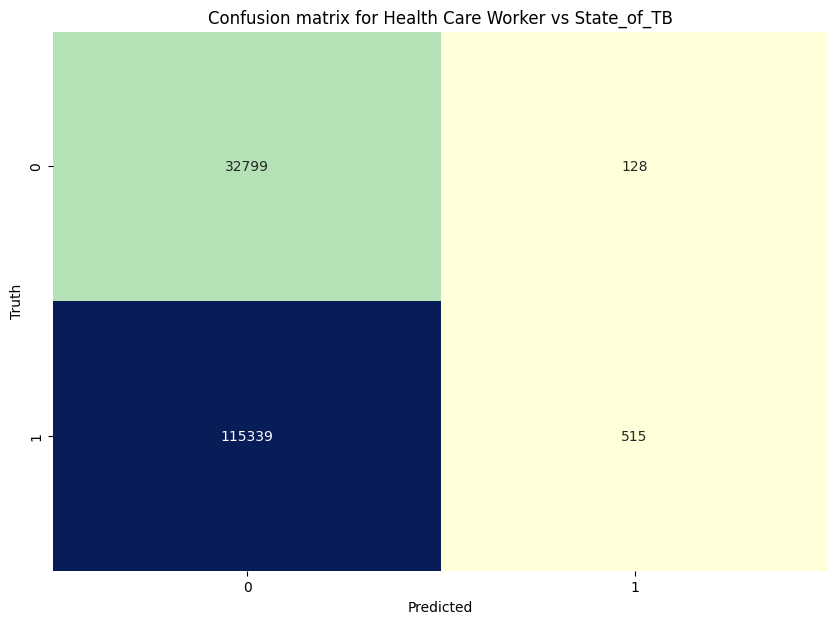

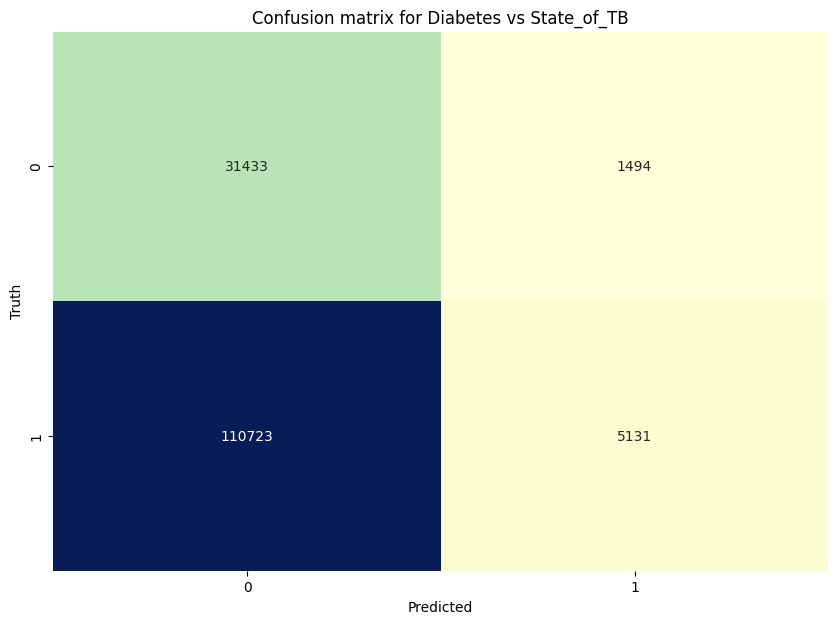

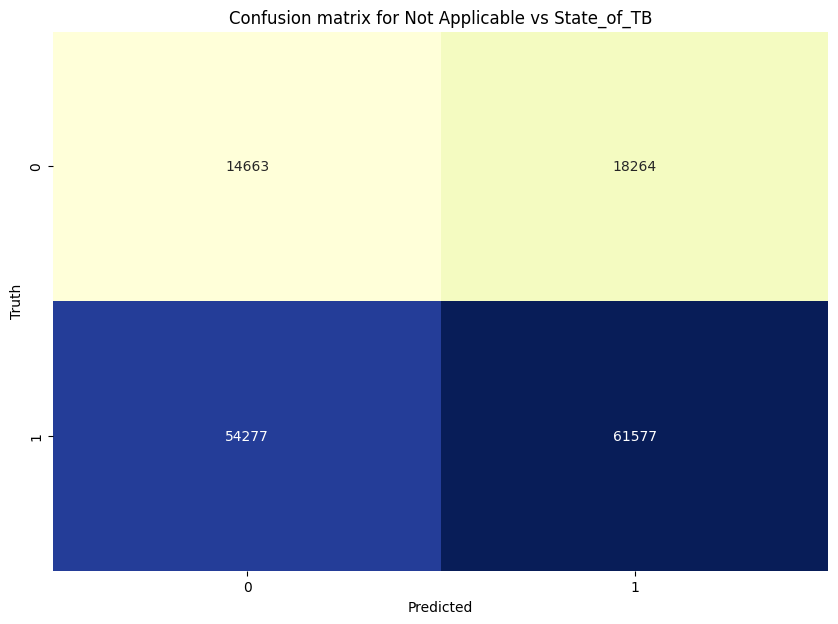

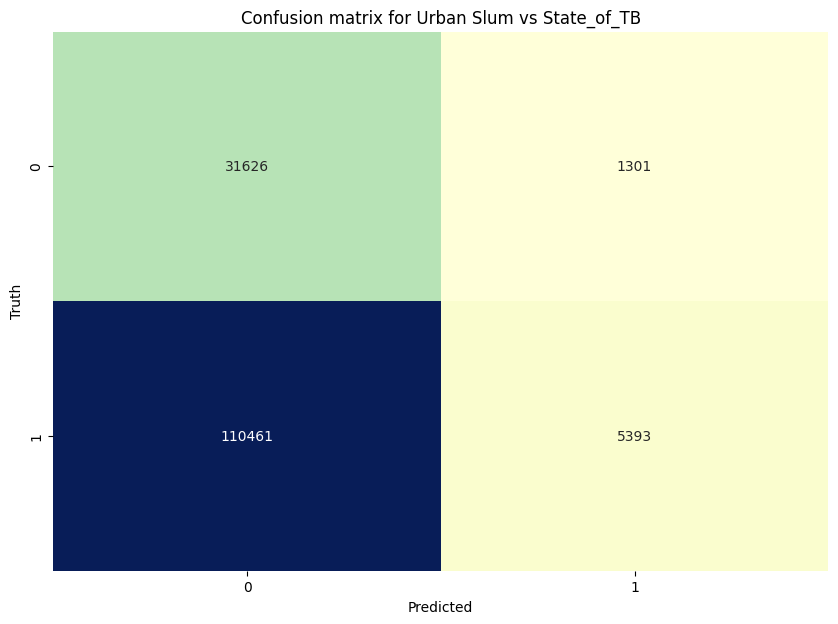

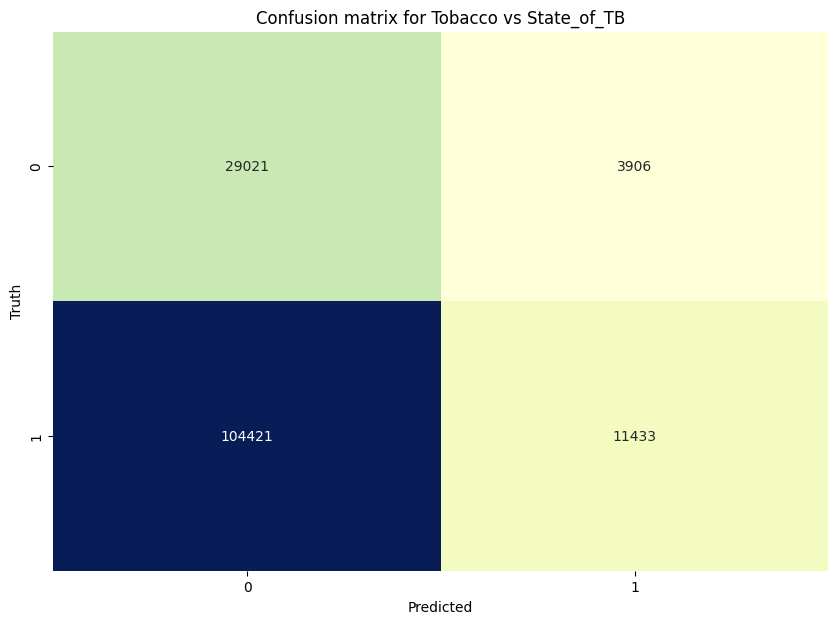

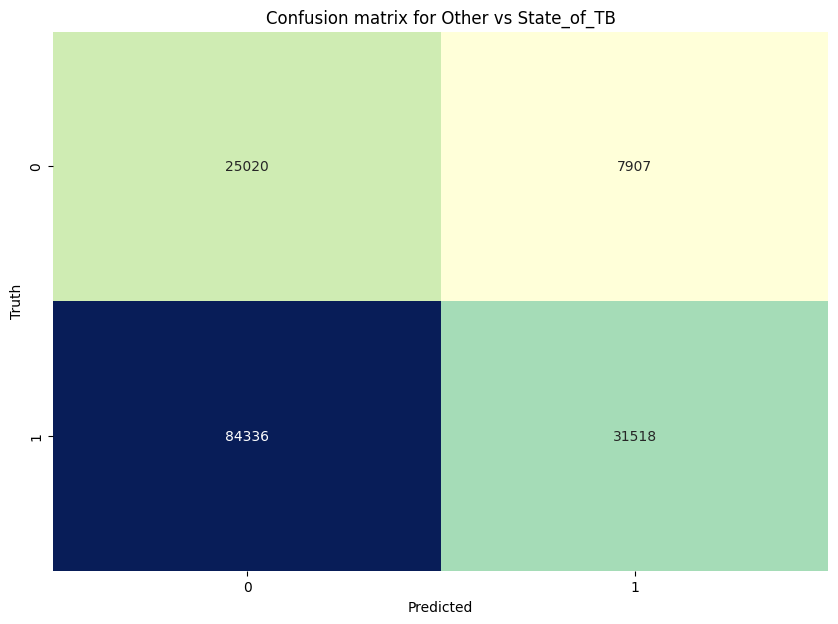

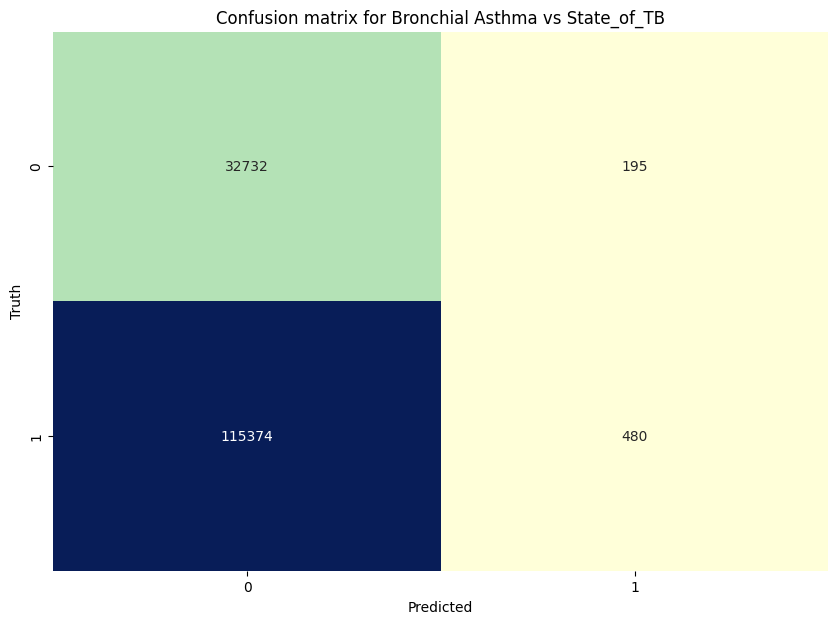

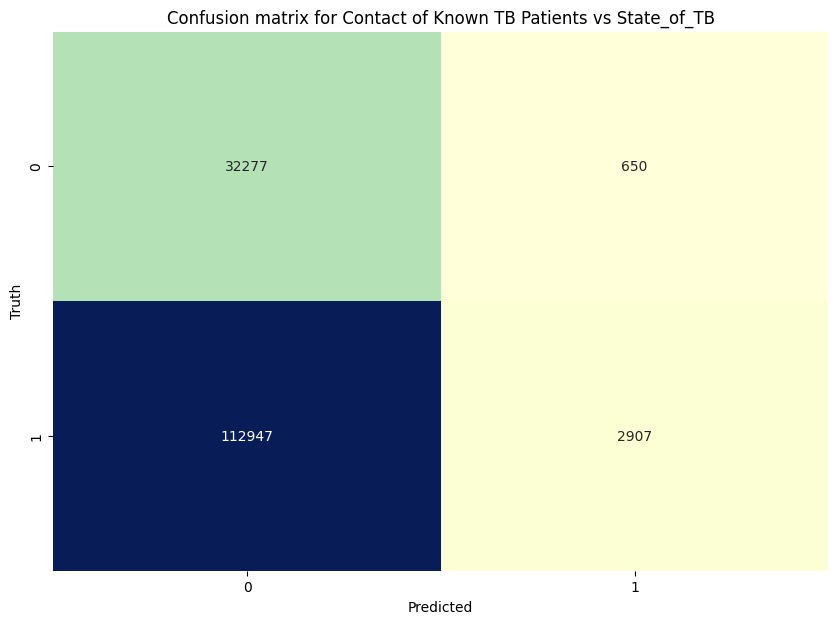

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from category_encoders import TargetEncoder
import numpy as np

# Initialize the encoder
encoder = TargetEncoder()

# Assuming df is your DataFrame and 'State_of_TB' is your target column
y_true = df['State_of_TB']

# Loop over all other columns in the DataFrame
for col in df.columns:
    if col != 'State_of_TB':
        # Encode the column values
        y_pred = encoder.fit_transform(df[col], y_true)

        # Binarize the output
        threshold = np.mean(y_pred)
        y_pred = np.where(y_pred >= threshold, 1, 0)

        cm = confusion_matrix(y_true, y_pred)

        plt.figure(figsize=(10,7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
        plt.title(f'Confusion matrix for {col} vs State_of_TB')
        plt.xlabel('Predicted')
        plt.ylabel('Truth')
        plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from category_encoders import TargetEncoder
import numpy as np
import os

# Create a directory to save the images
if not os.path.exists('confusion_matrices'):
    os.makedirs('confusion_matrices')

# Initialize the encoder
encoder = TargetEncoder()

# Assuming df is your DataFrame and 'State_of_TB' is your target column
y_true = df['State_of_TB']

# Loop over all other columns in the DataFrame
for col in df.columns:
    if col != 'State_of_TB':
        # Encode the column values
        y_pred = encoder.fit_transform(df[col], y_true)

        # Binarize the output
        threshold = np.mean(y_pred)
        y_pred = np.where(y_pred >= threshold, 1, 0)

        cm = confusion_matrix(y_true, y_pred)

        plt.figure(figsize=(10,7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
        plt.title(f'Confusion matrix for {col} vs State_of_TB')
        plt.xlabel('Predicted')
        plt.ylabel('Truth')

        # Save the figure to a file
        plt.savefig(f'confusion_matrices/{col}_vs_State_of_TB.png')
        plt.close()


In [ ]:
!apt-get install zip


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
zip is already the newest version (3.0-12build2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!zip -r /content/confusion_matrices.zip /content/confusion_matrices


  adding: content/confusion_matrices/ (stored 0%)
  adding: content/confusion_matrices/basisOfDiagnosis_TestName_vs_State_of_TB.png (deflated 24%)
  adding: content/confusion_matrices/Tobacco_vs_State_of_TB.png (deflated 26%)
  adding: content/confusion_matrices/Other_vs_State_of_TB.png (deflated 25%)
  adding: content/confusion_matrices/Contact of Known TB Patients_vs_State_of_TB.png (deflated 24%)
  adding: content/confusion_matrices/CurrentFacilityPHI_vs_State_of_TB.png (deflated 25%)
  adding: content/confusion_matrices/FollowupDone_Count_vs_State_of_TB.png (deflated 24%)
  adding: content/confusion_matrices/Covid19Status_vs_State_of_TB.png (deflated 25%)
  adding: content/confusion_matrices/BankDetailsAdded_vs_State_of_TB.png (deflated 25%)
  adding: content/confusion_matrices/Urban Slum_vs_State_of_TB.png (deflated 26%)
  adding: content/confusion_matrices/Gender_vs_State_of_TB.png (deflated 25%)
  adding: content/confusion_matrices/Diabetes_vs_State_of_TB.png (deflated 26%)
  ad

In [ ]:
from google.colab import files
files.download("/content/confusion_matrices.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df

,DiagnosingFacilityState,DiagnosingFacilityDistrict,DiagnosingFacilityTBU,DiagnosingFacilityPHI,DiagnosingFacilityPHIType,Patient_Status,Age,Gender,Weight,HIV_Status,...,State_of_TB,Tobacco,Not Applicable,Health Care Worker,Other,Bronchial Asthma,Contact of Known TB Patients,Migrant,Urban Slum,Diabetes
0,KARNATAKA,CHITRADURGA,CHITRADURGA URBAN,CHITRADURGA-DH,PHI,DIAGNOSED_OUTCOME_ASSIGNED,50,Male,45.0,Non-Reactive,...,1,0,1,0,0,0,0,0,0,0
1,KARNATAKA,TUMKUR,TUMKUR RURAL,TUMAKURU DH,PHI,DIAGNOSED_OUTCOME_ASSIGNED,60,Male,42.0,Reactive,...,1,0,0,0,1,0,0,0,0,0
2,KARNATAKA,UDUPI,UDUPI,DISTRICT HOSP.UDUPI-DH,PHI,DIAGNOSED_OUTCOME_ASSIGNED,31,Male,41.0,Non-Reactive,...,1,0,1,0,0,0,0,0,0,0
3,KARNATAKA,BELLARY,BELLARY,MC TB CELL VIMS,PHI,DIAGNOSED_OUTCOME_ASSIGNED,27,Male,50.0,Non-Reactive,...,1,0,1,0,0,0,0,0,0,0
4,KARNATAKA,DHARWAD,HUBBALLI EAST,KIMS-MC,PHI,DIAGNOSED_OUTCOME_ASSIGNED,36,Male,42.0,Non-Reactive,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148776,KARNATAKA,BAGALKOT,JAMAKHANDI,BADCHIKAR CLIANIC,PVTHF,DIAGNOSED_NOT_ON_TREATMENT,28,Male,75.0,Non-Reactive,...,0,0,1,0,0,0,0,0,0,0
148777,KARNATAKA,BENGALURU CITY,PALACE GUTTAHALLI,NATIONAL TB INSTITUTE BANGALORE,PHI,DIAGNOSED_ON_TREATMENT,24,Female,46.0,Non-Reactive,...,0,0,1,0,0,0,0,0,0,0
148778,KARNATAKA,BENGALURU CITY,VIDYAPEETA-TU,APPOLO SPECIALITY HOSPITAL STEPS VPTU,PVTHF,DIAGNOSED_ON_TREATMENT,22,Female,60.0,Unknown,...,0,0,1,0,0,0,0,0,0,0
148779,KARNATAKA,BENGALURU CITY,LAGGERE TU,KANVA DIAGNOSTICS ( MALLATHAHALLI PHI),PVTLAB,DIAGNOSED_ON_TREATMENT,58,Male,62.0,Unknown,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
df.columns

Index(['DiagnosingFacilityState', 'DiagnosingFacilityDistrict',
       'DiagnosingFacilityTBU', 'DiagnosingFacilityPHI',
       'DiagnosingFacilityPHIType', 'Patient_Status', 'Age', 'Gender',
       'Weight', 'HIV_Status', 'DiabetesStatus', 'basisOfDiagnosis_TestName',
       'CurrentFacilityDistrict', 'CurrentFacilityTBU', 'CurrentFacilityPHI',
       'CurrentFacilityPHIType', 'TypeOfCase', 'SiteOfDisease', 'EPSite',
       'BankDetailsAdded', 'FollowupDone_Count', 'ContactTracing_Done',
       'Current Health Facility Sector', 'Diagnosis Health Facility Sector',
       'BasisOfDiagnosis', 'RBS', 'CurrentTobaccoUser', 'HO_AlcoholIntake',
       'Covid19Status', 'PregnancyStatus', 'State_of_TB',
       'Contact of Known TB Patients', 'Other', 'Not Applicable', 'Diabetes',
       'Health Care Worker', 'Bronchial Asthma', 'Migrant', 'Urban Slum',
       'Tobacco'],
      dtype='object')

In [ ]:
# Assuming your DataFrame is named df
state_counts = df['State_of_TB'].value_counts()
print(state_counts)


1    115854
0     32927
Name: State_of_TB, dtype: int64


In [ ]:
# # download
# # smote and encoding
# # Importing necessary libraries
# from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# import xgboost as xgb
# import pandas as pd
# from category_encoders import TargetEncoder, CountEncoder, CatBoostEncoder, OrdinalEncoder
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.impute import SimpleImputer

# # Assuming 'df' is your DataFrame with target variable 'lfu'
# # Selecting all features
# X = df.drop(columns=['State_of_TB'])
# y = df['State_of_TB']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Encoding Techniques
# encoding_techniques = {
#     'Target Encoding': TargetEncoder(),
#     'Normalized Count Encoding': CountEncoder(normalize=True),
#     'CatBoost Encoding': CatBoostEncoder(),
#     'Ordinal Encoding': OrdinalEncoder(),
#     # Add more encoding techniques as needed
# }

# # Apply encoding techniques to training and testing sets
# for technique, encoder in encoding_techniques.items():
#     X_train_encoded = encoder.fit_transform(X_train, y_train)
#     X_test_encoded = encoder.transform(X_test)

#     # Create an imputer to fill missing values with the mean (for numerical features)
#     imputer = SimpleImputer(strategy='mean')
#     X_train_imputed = imputer.fit_transform(X_train_encoded)

#     # Now, apply SMOTE to balance the classes
#     smote = SMOTE(random_state=42)
#     X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)
#     # Print class distribution after SMOTE for each encoding technique
#     print(f"{technique}: After SMOTE - {Counter(y_train_resampled)}")

#     # Train a model (for example, XGBoost)
#     model = xgb.XGBClassifier(max_depth=10, random_state=42)
#     model.fit(X_train_resampled, y_train_resampled)

#     # Make predictions on the test set
#     y_pred = model.predict(X_test_encoded)

#     # Evaluate the model
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)

#     print(f"{technique} Metrics:")
#     print(f"  Accuracy: {accuracy}")
#     print(f"  Precision: {precision}")
#     print(f"  Recall: {recall}")
#     print(f"  F1 Score: {f1}\n")


# # Save the encoded file to a CSV file
# encoded_file_name = f'{technique}_encoded_data.csv'
# pd.DataFrame(X_train_resampled, columns=X_train_encoded.columns).to_csv(encoded_file_name, index=False)

# # # Download the encoded file
# # from google.colab import files

# # files.download(encoded_file_name)




Target Encoding: After SMOTE - Counter({1: 92689, 0: 92689})
Target Encoding Metrics:
  Accuracy: 0.8746513425412508
  Precision: 0.8819021418746316
  Recall: 0.9687027843729765
  F1 Score: 0.9232668175272577

Normalized Count Encoding: After SMOTE - Counter({1: 92689, 0: 92689})
Normalized Count Encoding Metrics:
  Accuracy: 0.8797257788083476
  Precision: 0.8808431204791164
  Recall: 0.9777681847614936
  F1 Score: 0.9267783710796047

CatBoost Encoding: After SMOTE - Counter({1: 92689, 0: 92689})
CatBoost Encoding Metrics:
  Accuracy: 0.8805995228013577
  Precision: 0.8775313775313776
  Recall: 0.983941290740341
  F1 Score: 0.9276949062862493

Ordinal Encoding: After SMOTE - Counter({1: 92689, 0: 92689})
Ordinal Encoding Metrics:
  Accuracy: 0.8786504015861814
  Precision: 0.8799549199440385
  Recall: 0.9774660047485431
  F1 Score: 0.9261508886025728



In [ ]:
import pandas as pd

# Assuming df is your DataFrame

# Grouping by 'DiagnosingFacilityDistrict' and counting unique 'DiagnosingFacilityTBU'
district_tbu_count = df.groupby('DiagnosingFacilityDistrict')['DiagnosingFacilityTBU'].nunique()

# Grouping by 'DiagnosingFacilityDistrict' and counting unique 'DiagnosingFacilityPHI'
district_phi_count = df.groupby('DiagnosingFacilityDistrict')['DiagnosingFacilityPHI'].nunique()

# Grouping by 'DiagnosingFacilityDistrict' and counting unique 'DiagnosingFacilityPHIType'
district_phi_type_count = df.groupby('DiagnosingFacilityDistrict')['DiagnosingFacilityPHIType'].nunique()

# Merge the Series into a single DataFrame
mapping_df = pd.concat([district_tbu_count, district_phi_count, district_phi_type_count], axis=1)

# Rename the columns
mapping_df.columns = ['TB_Units_Count', 'PHI_Count', 'PHI_Type_Count']

print(mapping_df)


                            TB_Units_Count  PHI_Count  PHI_Type_Count
DiagnosingFacilityDistrict                                           
BAGALKOT                                10        176               4
BELGAUM                                 15        354               3
BELLARY                                 14        243               3
BENGALURU CITY                          32       1207               4
BENGALURU RURAL                          4        101               4
BENGALURU URBAN                         14        256               4
BIDAR                                    8        158               4
CHAMARAJANAGAR                           6         79               3
CHIKKABALLAPUR                           6        103               3
CHIKMAGALUR                              7         65               3
CHITRADURGA                              7        145               3
DAKSHINA KANNADA                         8        250               4
DAVANAGERE          

                  Total  Cured (%)    LFU (%)
Training Data    119024  77.874210  22.125790
Evaluation Data   29757  77.847229  22.152771


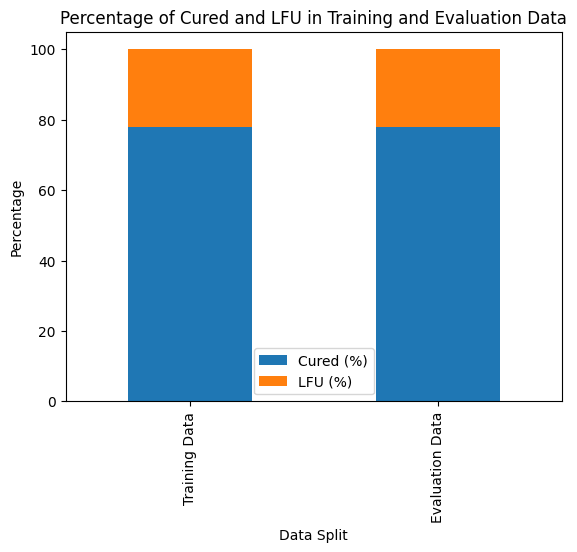

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'State_of_TB' is your column
  # replace with your actual DataFrame

# Split the data
train_df, eval_df = train_test_split(df, test_size=0.2, random_state=42)

# Calculate percentages and counts
def calculate_percentages(df):
    total = len(df)
    cured = len(df[df['State_of_TB'] == 1])
    lfu = len(df[df['State_of_TB'] == 0])
    return {'Total': total, 'Cured (%)': (cured/total)*100, 'LFU (%)': (lfu/total)*100}

# Create a DataFrame for the results
results_df = pd.DataFrame([calculate_percentages(train_df), calculate_percentages(eval_df)],
                          index=['Training Data', 'Evaluation Data'])

# Display the results
print(results_df)

# Plot the results
results_df[['Cured (%)', 'LFU (%)']].plot(kind='bar', stacked=True)
plt.title('Percentage of Cured and LFU in Training and Evaluation Data')
plt.xlabel('Data Split')
plt.ylabel('Percentage')
plt.show()


In [ ]:
# Assuming 'df' is your DataFrame
correlation_matrix = df.corr()

print(correlation_matrix)


<ipython-input-12-0705dc02a227>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


                                   Age    Weight  FollowupDone_Count  \
Age                           1.000000  0.258726           -0.008301   
Weight                        0.258726  1.000000            0.089638   
FollowupDone_Count           -0.008301  0.089638            1.000000   
RBS                           0.080189  0.049958           -0.012526   
State_of_TB                  -0.112058  0.043303            0.075772   
Urban Slum                   -0.041794  0.014544            0.026139   
Health Care Worker           -0.012049  0.008556           -0.004154   
Not Applicable               -0.017127  0.016624            0.064922   
Diabetes                      0.141370  0.109808            0.010361   
Contact of Known TB Patients -0.072105 -0.056762           -0.010793   
Other                        -0.055016 -0.039714           -0.055173   
Tobacco                       0.116325 -0.004947           -0.037187   
Bronchial Asthma              0.029159 -0.009487           -0.01

In [ ]:
missing_percentage = df.isnull().mean() * 100

# Print the result
print("Missing Percentage for Each Column:")
print(missing_percentage)

Missing Percentage for Each Column:
DiagnosingFacilityState             0.000000
DiagnosingFacilityDistrict          0.000000
DiagnosingFacilityTBU               0.000000
DiagnosingFacilityPHI               0.000000
DiagnosingFacilityPHIType           0.001344
Patient_Status                      0.000000
Age                                 0.000000
Gender                              0.000000
Weight                              0.260786
HIV_Status                          0.000000
DiabetesStatus                      0.000000
basisOfDiagnosis_TestName           0.000000
CurrentFacilityDistrict             0.000000
CurrentFacilityTBU                  0.000000
CurrentFacilityPHI                  0.000000
CurrentFacilityPHIType              0.000000
TypeOfCase                          0.000000
SiteOfDisease                       0.000000
EPSite                              0.000000
BankDetailsAdded                    0.000000
FollowupDone_Count                  0.000000
ContactTracing_Done

In [ ]:
!pip install -U imbalanced-learn
!pip install category_encoders
!pip install dirty_cat
!pip install tabulate
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.8/125.8 kB 2.2 MB/s eta 0:00:00


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
from category_encoders import TargetEncoder, CountEncoder, CatBoostEncoder, OrdinalEncoder
import numpy as np

!pip install catboost
from catboost import CatBoostClassifier
from category_encoders import CatBoostEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier




from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from category_encoders import TargetEncoder
from xgboost import XGBClassifier
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.3 MB/s eta 0:00:00


In [ ]:
# download
# smote and encoding
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
import pandas as pd
from category_encoders import TargetEncoder, CountEncoder, CatBoostEncoder, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Assuming 'df' is your DataFrame with target variable 'lfu'
# Selecting all features
# X = df.drop(columns=['State_of_TB'])
# y = df['State_of_TB']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encoding Techniques
encoding_techniques = {
    'Target Encoding': TargetEncoder(),
    'Normalized Count Encoding': CountEncoder(normalize=True),
    'CatBoost Encoding': CatBoostEncoder(),
    'Ordinal Encoding': OrdinalEncoder(),
    # Add more encoding techniques as needed
}

# Apply encoding techniques to training and testing sets
for technique, encoder in encoding_techniques.items():
    X_train_encoded = encoder.fit_transform(X_train, y_train)
    X_test_encoded = encoder.transform(X_test)

    # Create an imputer to fill missing values with the mean (for numerical features)
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train_encoded)

    # Now, apply SMOTE to balance the classes
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)
    # Print class distribution after SMOTE for each encoding technique
    print(f"{technique}: After SMOTE - {Counter(y_train_resampled)}")

    # Train a model (for example, XGBoost)
    model = xgb.XGBClassifier(max_depth=10, random_state=42)
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test set
    y_pred = model.predict(X_test_encoded)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"{technique} Metrics:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1 Score: {f1}\n")


# Save the encoded file to a CSV file
encoded_file_name = f'{technique}_encoded_data.csv'
pd.DataFrame(X_train_resampled, columns=X_train_encoded.columns).to_csv(encoded_file_name, index=False)

# Download the encoded file
# from google.colab import files

# files.download(encoded_file_name)




Target Encoding: After SMOTE - Counter({1: 46093, 0: 46093})


KeyboardInterrupt: 

In [ ]:
df.shape


(148781, 40)

In [ ]:

# Assuming df contains your DataFrame

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(df.drop('State_of_TB', axis=1), df['State_of_TB'], test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

# Get the categorical columns
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Initialize and fit the target encoder
target_encoder = TargetEncoder(cols=categorical_columns)
X_train_target = target_encoder.fit_transform(X_train, y_train)
X_val_target = target_encoder.transform(X_val)
X_test_target = target_encoder.transform(X_test)

# Print the size of the transformed data
print(f"Size of X_train_target: {X_train_target.shape}")
print(f"Size of X_val_target: {X_val_target.shape}")
print(f"Size of X_test_target: {X_test_target.shape}")

# Train the XGBoost model
model = XGBClassifier(objective='binary:logistic')
model.fit(X_train_target, y_train)

# Evaluate the model on validation set
y_val_pred = model.predict(X_val_target)
accuracy_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)

print('Validation Accuracy:', accuracy_val)
print('Validation Precision:', precision_val)
print('Validation Recall:', recall_val)

# Evaluate the model on test set
y_test_pred = model.predict(X_test_target)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)

print('Test Accuracy:', accuracy_test)
print('Test Precision:', precision_test)
print('Test Recall:', recall_test)


Size of X_train_target: (119024, 39)
Size of X_val_target: (14878, 39)
Size of X_test_target: (14879, 39)
Validation Accuracy: 0.8792848501142627
Validation Precision: 0.8817990817835188
Validation Recall: 0.9761392023430098
Test Accuracy: 0.881040392499496
Test Precision: 0.8815953793318764
Test Recall: 0.9780914444059577


In [ ]:
df

,DiagnosingFacilityState,DiagnosingFacilityDistrict,DiagnosingFacilityTBU,DiagnosingFacilityPHI,DiagnosingFacilityPHIType,Patient_Status,Age,Gender,Weight,HIV_Status,...,PregnancyStatus,Tobacco,Contact of Known TB Patients,Not Applicable,Bronchial Asthma,Other,Urban Slum,Migrant,Health Care Worker,Diabetes
0,KARNATAKA,CHITRADURGA,CHITRADURGA URBAN,VAYUPUTRA CHEST CLINIC,PHI,DIAGNOSED_NOT_ON_TREATMENT,21,Female,111,Non_Reactive,...,Not applicable,1,1,1,1,1,1,1,0,1


In [ ]:
num_columns = len(df.columns)
print("Number of columns:", num_columns)

Number of columns: 40


In [ ]:
df.columns

In [ ]:
# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(df.drop('State_of_TB', axis=1), df['State_of_TB'], test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Get the categorical columns
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

In [ ]:
print(categorical_columns)

['DiagnosingFacilityState', 'DiagnosingFacilityDistrict', 'DiagnosingFacilityTBU', 'DiagnosingFacilityPHI', 'DiagnosingFacilityPHIType', 'Patient_Status', 'Gender', 'HIV_Status', 'DiabetesStatus', 'basisOfDiagnosis_TestName', 'CurrentFacilityDistrict', 'CurrentFacilityTBU', 'CurrentFacilityPHI', 'CurrentFacilityPHIType', 'TypeOfCase', 'SiteOfDisease', 'EPSite', 'BankDetailsAdded', 'ContactTracing_Done', 'Current Health Facility Sector', 'Diagnosis Health Facility Sector', 'BasisOfDiagnosis', 'CurrentTobaccoUser', 'HO_AlcoholIntake', 'Covid19Status', 'PregnancyStatus']


In [ ]:

target = 'State_of_TB'

X_temp, X_test, y_temp, y_test = train_test_split(df.drop(target, axis=1), df[target], test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Create a CatBoost encoder
cb_encoder = CatBoostEncoder(cols=categorical_columns)


# Transform the data using the CatBoost encoder
X_train_cb = cb_encoder.fit_transform(X_train, y_train)

X_val_cb = cb_encoder.transform(X_val)
X_test_cb = cb_encoder.transform(X_test)

# Train the XGBoost model
model = XGBClassifier(objective='binary:logistic', random_state=42)
model.fit(X_train_cb, y_train)

# Evaluate the model on validation set
y_val_pred = model.predict(X_val_cb)
accuracy_val = np.mean(y_val_pred == y_val)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)

print('Validation Accuracy:', accuracy_val)
print('Validation Precision:', precision_val)
print('Validation Recall:', recall_val)

# Evaluate the model on test set
y_test_pred = model.predict(X_test_cb)
accuracy_test = np.mean(y_test_pred == y_test)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)

print('Test Accuracy:', accuracy_test)
print('Test Precision:', precision_test)
print('Test Recall:', recall_test)

Validation Accuracy: 0.8836873235649952
Validation Precision: 0.8829388826686229
Validation Recall: 0.9815864022662889
Test Accuracy: 0.8807339449541285
Test Precision: 0.8781907920104881
Test Recall: 0.9831642564213253


In [ ]:
print(X_train_cb.iloc[0])


DiagnosingFacilityState              0.774516
DiagnosingFacilityDistrict           0.774516
DiagnosingFacilityTBU                0.774516
DiagnosingFacilityPHI                0.774516
DiagnosingFacilityPHIType            0.774516
Patient_Status                       0.774516
Age                                 25.000000
Gender                               0.774516
Weight                              45.000000
HIV_Status                           0.774516
DiabetesStatus                       0.774516
basisOfDiagnosis_TestName            0.774516
CurrentFacilityDistrict              0.774516
CurrentFacilityTBU                   0.774516
CurrentFacilityPHI                   0.774516
CurrentFacilityPHIType               0.774516
TypeOfCase                           0.774516
SiteOfDisease                        0.774516
EPSite                               0.774516
BankDetailsAdded                     0.774516
FollowupDone_Count                   1.000000
ContactTracing_Done               

In [ ]:
import joblib

# Save the XGBoost model
model.save_model('xgboost_model.model')

# Save the CatBoost encoder
joblib.dump(cb_encoder, 'catboost_encoder.pkl')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:59:48] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


['catboost_encoder.pkl']

In [ ]:
import pandas as pd

# Your dictionary
data_point = {
    'DiagnosingFacilityState': 'KARNATAKA',
    'DiagnosingFacilityDistrict': 'CHITRADURGA',
    'DiagnosingFacilityTBU': 'CHITRADURGA URBAN',
    'DiagnosingFacilityPHI': 'VAYUPUTRA CHEST CLINIC',
    'DiagnosingFacilityPHIType': 'PHI',
    'Patient_Status': 'DIAGNOSED_NOT_ON_TREATMENT',
    'Age': '21',
    'Gender': 'Female',
    'Weight': '111',
    'HIV_Status': 'Non_Reactive',
    'DiabetesStatus': 'Diabetic',
    'basisOfDiagnosis_TestName': 'CBNAAT',
    'CurrentFacilityDistrict': 'KOPPAL',
    'CurrentFacilityTBU': 'KUKANOOR',
    'CurrentFacilityPHI': 'CHIKENAKOPPA PHC',
    'CurrentFacilityPHIType': 'PHI',
    'TypeOfCase': 'New Smear Negative PTB',
    'SiteOfDisease': 'Pulmonary',
    'EPSite': 'unknown',
    'BankDetailsAdded': 'Yes',
    'FollowupDone_Count': '11',
    'ContactTracing_Done': 'Yes',
    'Current Health Facility Sector': 'Public',
    'Diagnosis Health Facility Sector': 'Public',
    'BasisOfDiagnosis': 'Microbiologically confirmed',
    'RBS': '121',
    'CurrentTobaccoUser': 'Negative',
    'HO_AlcoholIntake': 'No',
    'Covid19Status': 'Negative',
    'PregnancyStatus': 'Not applicable',
    'Tobacco': '1',
    'Contact of Known TB Patients': '1',
    'Not Applicable': '1',
    'Bronchial Asthma': '1',
    'Other': '1',
    'Urban Slum': '1',
    'Migrant': '1',
    'Health Care Worker': '0',
    'Diabetes': '1'
}

# Convert the dictionary to DataFrame with index as 0
df = pd.DataFrame(data_point, index=[0])

print(df)

# Convert DataFrame to dictionary
result_dict = df.to_dict(orient='records')[0]

# Print the dictionary
print(result_dict)


  DiagnosingFacilityState DiagnosingFacilityDistrict DiagnosingFacilityTBU  \
0               KARNATAKA                CHITRADURGA     CHITRADURGA URBAN   

    DiagnosingFacilityPHI DiagnosingFacilityPHIType  \
0  VAYUPUTRA CHEST CLINIC                       PHI   

               Patient_Status Age  Gender Weight    HIV_Status  ...  \
0  DIAGNOSED_NOT_ON_TREATMENT  21  Female    111  Non_Reactive  ...   

  PregnancyStatus Tobacco Contact of Known TB Patients Not Applicable  \
0  Not applicable       1                            1              1   

  Bronchial Asthma Other Urban Slum Migrant Health Care Worker Diabetes  
0                1     1          1       1                  0        1  

[1 rows x 39 columns]
{'DiagnosingFacilityState': 'KARNATAKA', 'DiagnosingFacilityDistrict': 'CHITRADURGA', 'DiagnosingFacilityTBU': 'CHITRADURGA URBAN', 'DiagnosingFacilityPHI': 'VAYUPUTRA CHEST CLINIC', 'DiagnosingFacilityPHIType': 'PHI', 'Patient_Status': 'DIAGNOSED_NOT_ON_TREATMENT', 'Age

In [ ]:
import pandas as pd
import xgboost as xgb

# Assuming x is your dictionary
x = {'DiagnosingFacilityState': {0: 'KARNATAKA'}, 'DiagnosingFacilityDistrict': {0: 'KOLAR'}, 'DiagnosingFacilityTBU': {0: 'MALUR'}, 'DiagnosingFacilityPHI': {0: 'SRI LEELASAI HOSPITAL'}, 'DiagnosingFacilityPHIType': {0: 'PHI'}, 'Patient_Status': {0: 'DIAGNOSED_OUTCOME_ASSIGNED'}, 'Age': {0: '23'}, 'Gender': {0: 'Female'}, 'Weight': {0: '123'}, 'HIV_Status': {0: 'Non-Reactive'}, 'DiabetesStatus': {0: 'Diabetic'}, 'basisOfDiagnosis_TestName': {0: 'Microscopy ZN'}, 'CurrentFacilityDistrict': {0: 'KOPPAL'}, 'CurrentFacilityTBU': {0: 'KUSTAGI'}, 'CurrentFacilityPHI': {0: 'SANGAMESHWAR CHILD HEALTH CENTRE'}, 'CurrentFacilityPHIType': {0: 'PVTHF'}, 'TypeOfCase': {0: 'New'}, 'SiteOfDisease': {0: 'Extra Pulmonary'}, 'EPSite': {0: 'Miliary'}, 'BankDetailsAdded': {0: 'Yes'}, 'FollowupDone_Count': {0: '12'}, 'Contact of Known TB Patients '0'}, 'Health Care Worker': {0: '0'}, 'Diabetes': {0: '1'}}
# Convert dictionary to DataFrame
x_df = pd.DataFrame(x)

# Convert numerical columns to float
numerical_columns = ['Age', 'Weight', 'FollowupDone_Count', 'RBS', 'Tobacco',
                     'Contact of Known TB Patients', 'Not Applicable',
                     'Bronchial Asthma', 'Other', 'Urban Slum', 'Migrant',
                     'Health Care Worker', 'Diabetes']

for col in numerical_columns:
    x_df[col] = x_df[col].astype(float)

# Load your encoder model (assuming it's already initialized and named cb_encoder)
# cb_encoder = your_model_initialization()

# Now you can use the encoder to transform the DataFrame
user_input_cb = cb_encoder.transform(x_df)

# Print column names and dimensions after encoding
print("Columns after encoding:", user_input_cb.columns)
print("Dimensions after encoding:", user_input_cb.shape)

# Now you can predict the probabilities
# Assuming model is your trained classifier
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
model.load_model('xgboost_model.model')

probabilities = model.predict_proba(user_input_cb)
x= probabilities

# Now you can print the probabilities for each class or do further analysis
print("changed result",( x*100))


SyntaxError: unterminated string literal (detected at line 5) (<ipython-input-77-720b6acd62c6>, line 5)

In [ ]:
user_input_df = pd.DataFrame(user_input_dict)

    # Ensure that categorical columns are of 'category' data type
    for col in user_input_df.select_dtypes(include=['object']).columns:
     user_input_df[col] = user_input_df[col].astype('category')

    # Encode categorical features using the CatBoost encoder
    user_input_cb = cb_encoder.transform(user_input_df)

    # Use the trained XGBoost model to predict the probability for the user-provided test point
    predicted_probabilities = model.predict_proba(user_input_cb)

    # Get the probability of class 1
    probability_of_class_1 = predicted_probabilities[0][1] # Probability of Class 1

    # Calculate the percentage from the probability
    percentage = probability_of_class_1 * 100

In [ ]:
# Check the size of the input DataFrame (df)
print("Size of input DataFrame (df):", x_df.shape)

# Check the size of the encoded DataFrame (encoded_df)
print("Size of encoded DataFrame (encoded_df):",user_input_cb.shape)


Size of input DataFrame (df): (1, 39)
Size of encoded DataFrame (encoded_df): (1, 39)


In [ ]:
import xgboost as xgb

model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
model.load_model('xgboost_model.model')

# Now you can use the model for prediction or evaluation
print(model)

# If you want to see the model's parameters, you can access them like this:
print(model.get_params())


XGBClassifier(base_score='7.4989724E-1', booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
{'objective': 'binary:logistic', 'base_score': '7.4989724E-1', 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, '

In [ ]:
percentage_prediction = model.predict(user_input_cb)

print("Percentage prediction:", percentage_prediction)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Age: object, Weight: object, FollowupDone_Count: object, RBS: object, Tobacco: object, Contact of Known TB Patients: object, Not Applicable: object, Bronchial Asthma: object, Other: object, Urban Slum: object, Migrant: object, Health Care Worker: object, Diabetes: object

In [ ]:
import xgboost as xgb
import pandas as pd

# Assuming model is your trained XGBoost model
# Assuming cb_encoder is your category encoder

# Load your trained XGBoost model and category encoder

# Assuming x is your dictionary
x = {'DiagnosingFacilityState': {0: 'KARNATAKA'}, 'DiagnosingFacilityDistrict': {0: 'BENGALURU URBAN'}, 'DiagnosingFacilityTBU': {0: 'INACTIVE YALAHANKA'}, 'DiagnosingFacilityPHI': {0: 'LAKSHMI CLINIC'}, 'DiagnosingFacilityPHIType': {0: 'PVTLAB'}, 'Patient_Status': {0: 'DIAGNOSED_ON_TREATMENT'}, 'Age': {0: '34'}, 'Gender': {0: 'Male'}, 'Weight': {0: '65'}, 'HIV_Status': {0: 'Non-Reactive'}, 'DiabetesStatus': {0: 'Non-diabetic'}, 'basisOfDiagnosis_TestName': {0: 'Histopathology'}, 'CurrentFacilityDistrict': {0: 'CHITRADURGA'}, 'CurrentFacilityTBU': {0: 'CHITRADURGA RURAL'}, 'CurrentFacilityPHI': {0: 'TURUVANURU-PHC'}, 'CurrentFacilityPHIType': {0: 'PVTLAB'}, 'TypeOfCase': {0: 'PMDT'}, 'SiteOfDisease': {0: 'Extra Pulmonary'}, 'EPSite': {0: 'Abdominal'}, 'BankDetailsAdded': {0: 'No'}, 'FollowupDone_Count': {0: '5'}, 'ContactTracing_Done': {0: 'No                                                '}, 'Current Health Facility Sector': {0: 'Public'}, 'Diagnosis Health Facility Sector': {0: 'Public'}, 'BasisOfDiagnosis': {0: 'Clinically diagnosed'}, 'RBS': {0: '150'}, 'CurrentTobaccoUser': {0: 'Negative'}, 'HO_AlcoholIntake': {0: 'Unknown'}, 'Covid19Status': {0: 'Negative'}, 'PregnancyStatus': {0: 'Not applicable'}, 'Tobacco': {0: '1'}, 'Contact of Known TB Patients': {0: '0'}, 'Not Applicable': {0: '0'}, 'Bronchial Asthma': {0: '0'}, 'Other': {0: '1'}, 'Urban Slum': {0: '1'}, 'Migrant': {0: '0'}, 'Health Care Worker': {0: '0'}, 'Diabetes': {0: '0'}}
# Convert dictionary to DataFrame
x_df = pd.DataFrame(x)

# Encode categorical features
user_input_cb = cb_encoder.transform(x_df)

# Make predictions
percentage_prediction = model.predict(user_input_cb)

print("Percentage prediction:", percentage_prediction)


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Age: object, Weight: object, FollowupDone_Count: object, RBS: object, Tobacco: object, Contact of Known TB Patients: object, Not Applicable: object, Bronchial Asthma: object, Other: object, Urban Slum: object, Migrant: object, Health Care Worker: object, Diabetes: object

# Dont Touch


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb



# Function to calculate Weight of Evidence (WoE)
def calculate_woe(df, feature, target):
    event_total = df[target].sum()
    non_event_total = df.shape[0] - event_total

    woe_dict = {}
    for category in df[feature].unique():
        event_count = df[df[feature] == category][target].sum()
        non_event_count = df[df[feature] == category].shape[0] - event_count

        if event_count == 0:
            event_count += 0.5
        if non_event_count == 0:
            non_event_count += 0.5

        woe = np.log(non_event_count / non_event_total / (event_count / event_total))
        woe_dict[category] = woe

    return woe_dict

# Function to calculate Information Value (IV)
def calculate_iv(df, feature, target):
    woe_dict = calculate_woe(df, feature, target)
    iv = 0
    for woe in woe_dict.values():
        iv += woe
    return iv

# Calculate IV for each feature
iv_data = {}
for feature in df.drop('State_of_TB', axis=1).columns:
    iv_data[feature] = calculate_iv(df, feature, 'State_of_TB')

# Print the IV data
print("Information Value (IV) for each feature:")
for feature, iv_value in iv_data.items():
    print(f"{feature}: {iv_value}")

# Encoding categorical variables using WoE
encoded_df = df.copy()
for feature in df.drop('State_of_TB', axis=1).columns:
    woe_dict = calculate_woe(df, feature, 'State_of_TB')
    encoded_df[feature] = df[feature].map(woe_dict)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(encoded_df.drop('State_of_TB', axis=1), df['State_of_TB'], test_size=0.2, random_state=42)

print(f"Number of columns before training: {X_train.shape[1]}")

# Train XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Information Value (IV) for each feature:
DiagnosingFacilityState: 0.0
DiagnosingFacilityDistrict: 0.26570105334996175
DiagnosingFacilityTBU: -27.94705732371486
DiagnosingFacilityPHI: 1330.297918228917
DiagnosingFacilityPHIType: -0.03871876598983315
Patient_Status: 26.642345913111072
Age: 20.91504539076902
Gender: -0.15015128132713718
Weight: -4.90278219557049
HIV_Status: 3.5484333918403737
DiabetesStatus: 3.5707947461753236
basisOfDiagnosis_TestName: 7.59264250916548
CurrentFacilityDistrict: -0.48619735047094836
CurrentFacilityTBU: 11.286606977745844
CurrentFacilityPHI: 1821.7435411327072
CurrentFacilityPHIType: -0.41324104270726375
TypeOfCase: 1.2367334796744511
SiteOfDisease: -0.2708273372157351
EPSite: -2.061472939288704
BankDetailsAdded: 1.2430338947466182
FollowupDone_Count: -47.84615901878703
ContactTracing_Done: 1.7905006741954375
Current Health Facility Sector: -0.08386713413270326
Diagnosis Health Facility Sector: 1.0719712445431
BasisOfDiagnosis: -0.12535949145475822
RBS: 59.

In [ ]:
import joblib

# Save the XGBoost model
model.save_model('xgboost_model.model')

# Save the CatBoost encoder
joblib.dump(woe_dict, 'enc_encoder.pkl')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [08:40:54] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


['enc_encoder.pkl']

In [ ]:
import pandas as pd


# Assuming x is your dictionary
x = {'DiagnosingFacilityState': {0: 'KARNATAKA'}, 'DiagnosingFacilityDistrict': {0: 'KOLAR'},
     # Add other features here
}

# Convert dictionary to DataFrame
x_df = pd.DataFrame(x)

# Function to encode DataFrame using WoE
def encode_with_woe(df, encoder_dict):
    encoded_df = df.copy()
    for feature, encoding in encoder_dict.items():
        encoded_df[feature] = df[feature].map(encoding)
    return encoded_df

# Encode DataFrame using WoE
encoded_df = encode_with_woe(x_df, woe_dict)

# Print the encoded DataFrame
print(encoded_df)

KeyError: 0

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from xgboost import XGBClassifier
from category_encoders import TargetEncoder, CountEncoder, CatBoostEncoder, OrdinalEncoder, LeaveOneOutEncoder
from dirty_cat import SimilarityEncoder
import numpy as np

# Assuming df contains your DataFrame

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(df.drop('State_of_TB', axis=1), df['State_of_TB'], test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

# Get the categorical columns
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Define encoding techniques
encoding_techniques = {
    'Target Encoding': TargetEncoder(cols=categorical_columns),
    'Count Encoding': CountEncoder(cols=categorical_columns),
    'CatBoost Encoding': CatBoostEncoder(cols=categorical_columns),
    'Ordinal Encoding': OrdinalEncoder(cols=categorical_columns),
    'Leave-One-Out Encoding': LeaveOneOutEncoder(cols=categorical_columns),
    # 'Similarity Encoding': SimilarityEncoder(similarity='ngram', categories='most_frequent')
    # Add other encoding techniques as needed
}

# Apply each encoding technique and print the number of columns after encoding
for technique, encoder in encoding_techniques.items():
    # Fit and transform the encoder on the training set
    X_train_encoded = encoder.fit_transform(X_train, y_train)
    X_val_encoded = encoder.transform(X_val)
    X_test_encoded = encoder.transform(X_test)

    # Print the number of columns after encoding
    print(f"Number of columns after {technique}: {X_train_encoded.shape[1]}")

    # Train the XGBoost model
    model = XGBClassifier(objective='binary:logistic', random_state=42)
    model.fit(X_train_encoded, y_train)

    # Evaluate the model on validation set
    y_val_pred = model.predict(X_val_encoded)
    accuracy_val = accuracy_score(y_val, y_val_pred)
    precision_val = precision_score(y_val, y_val_pred)
    recall_val = recall_score(y_val, y_val_pred)

    print(f'\nValidation Metrics for {technique}:')
    print('Validation Accuracy:', accuracy_val)
    print('Validation Precision:', precision_val)
    print('Validation Recall:', recall_val)

    # Evaluate the model on test set
    y_test_pred = model.predict(X_test_encoded)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)

    print(f'\nTest Metrics for {technique}:')
    print('Test Accuracy:', accuracy_test)
    print('Test Precision:', precision_test)
    print('Test Recall:', recall_test)


Number of columns after Target Encoding: 40

Validation Metrics for Target Encoding:
Validation Accuracy: 0.8718913832504369
Validation Precision: 0.8754292850452701
Validation Recall: 0.9731042859621725

Test Metrics for Target Encoding:
Test Accuracy: 0.8801666778681363
Test Precision: 0.8841752938429205
Test Recall: 0.9746868028144843
Number of columns after Count Encoding: 40

Validation Metrics for Count Encoding:
Validation Accuracy: 0.8806291168167765
Validation Precision: 0.8758673862760216
Validation Recall: 0.9855977789345827

Test Metrics for Count Encoding:
Test Accuracy: 0.8863498891054507
Test Precision: 0.8835168219262453
Test Recall: 0.9847262742406041
Number of columns after CatBoost Encoding: 40

Validation Metrics for CatBoost Encoding:
Validation Accuracy: 0.8777389434063718
Validation Precision: 0.8715455867717982
Validation Recall: 0.9877667881311817

Test Metrics for CatBoost Encoding:
Test Accuracy: 0.8860138450164662
Test Precision: 0.8810653604775753
Test Reca

In [ ]:
from category_encoders import TargetEncoder, CountEncoder, CatBoostEncoder, OrdinalEncoder
from dirty_cat import GapEncoder, MinHashEncoder, SimilarityEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import xgboost as xgb

class ProbabilityRatioEncoder:
    def fit(self, X, y):
        self.prob_ratio = {}
        for col in X.columns:
            prob_df = pd.DataFrame(y).join(X[col])
            prob_df = prob_df.groupby(X[col].name)[y.name].mean()
            self.prob_ratio[col] = prob_df / (1.000001 - prob_df)
        return self

    def transform(self, X):
        return X.apply(lambda x: x.map(self.prob_ratio[x.name]))


class LogOddsRatioEncoder:
    def fit(self, X, y):
        self.log_odds_ratio = {}
        odds_ratio_encoder = OddsRatioEncoder().fit(X, y)
        odds_ratio = odds_ratio_encoder.transform(X)
        for col in odds_ratio.columns:
            self.log_odds_ratio[col] = np.log(odds_ratio[col])
        return self

    def transform(self, X):
        odds_ratio = X.apply(lambda x: x.map(self.log_odds_ratio[x.name]))
        return np.log(odds_ratio)


class OddsRatioEncoder:
    def fit(self, X, y):
        self.odds_ratio = {}
        for col in X.columns:
            prob_df = pd.DataFrame(y).join(X[col])
            prob_df = prob_df.groupby(X[col].name)[y.name].mean()
            self.odds_ratio[col] = prob_df / (1.000001 - prob_df)
        return self

    def transform(self, X):
        return X.apply(lambda x: x.map(self.odds_ratio[x.name]))


class SimilarityCountEncoder:
    def __init__(self):
        self.count_encoder = CountEncoder(normalize=True)
        self.similarity_encoder = SimilarityEncoder(similarity='ngram')

    def fit(self, X, y=None):
        # Convert input data to string format
        X_str = X.astype(str)

        # Apply count encoding
        X_count_encoded = self.count_encoder.fit_transform(X_str)

        # Fit similarity encoder on count-encoded data
        self.similarity_encoder.fit(X_count_encoded)

        return self

    def transform(self, X):
        # Convert input data to string format
        X_str = X.astype(str)

        # Apply count encoding
        X_count_encoded = self.count_encoder.transform(X_str)

        # Apply similarity encoding to count-encoded data
        X_similarity_count_encoded = self.similarity_encoder.transform(X_count_encoded)

        return X_similarity_count_encoded

# Define encoding techniques
encoding_techniques = {
    'Target Encoding': TargetEncoder(),
    'Normalized Count Encoding': CountEncoder(normalize=True),
    'CatBoost Encoding': CatBoostEncoder(),
    'Ordinal Encoding': OrdinalEncoder(),
    'Probability Ratio Encoding': ProbabilityRatioEncoder(),
    'Log-Odds Ratio Encoding': LogOddsRatioEncoder(),
    'Odds Ratio Encoding': OddsRatioEncoder(),
    'Similarity Count Encoding': SimilarityCountEncoder(),
    # Add your own encoders here...
}

# Assuming df, X_train, X_test, y_train, y_test are already defined

# Create a list to store DataFrames
dfs = []

# Evaluate each encoding technique
for technique, encoder in encoding_techniques.items():
    try:
        # Fit the encoder on the training set and transform
        encoder.fit(X_train, y_train)
        X_train_encoded = encoder.transform(X_train)
        X_val_encoded = encoder.transform(X_val)
        X_test_encoded = encoder.transform(X_test)

        # Print the number of columns after encoding
        print(f"{technique} Encoded Columns: {X_train_encoded.shape[1]}")

        # Build and Train XGBoost Model
        xgb_model = xgb.XGBClassifier(max_depth=10, random_state=42)
        xgb_model.fit(X_train_encoded, y_train)

        # Make predictions on the validation set
        y_val_pred = xgb_model.predict(X_val_encoded)

        # Calculate validation metrics
        val_accuracy = accuracy_score(y_val, y_val_pred)
        val_precision = precision_score(y_val, y_val_pred)
        val_recall = recall_score(y_val, y_val_pred)
        val_f1 = f1_score(y_val, y_val_pred)

        # Make predictions on the test set
        y_test_pred = xgb_model.predict(X_test_encoded)

        # Calculate test metrics
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred)
        test_recall = recall_score(y_test, y_test_pred)
        test_f1 = f1_score(y_test, y_test_pred)

        # Create a DataFrame for each technique
        df = pd.DataFrame({
            'Technique': [technique],
            'Validation Accuracy': [val_accuracy],
            'Validation Precision': [val_precision],
            'Validation Recall': [val_recall],
            'Validation F1 Score': [val_f1],
            'Test Accuracy': [test_accuracy],
            'Test Precision': [test_precision],
            'Test Recall': [test_recall],
            'Test F1 Score': [test_f1]
        })

        # Append the DataFrame to the list
        dfs.append(df)

        print(f"{technique} Validation Metrics:")
        print(f"  Accuracy: {val_accuracy}")
        print(f"  Precision: {val_precision}")
        print(f"  Recall: {val_recall}")
        print(f"  F1 Score: {val_f1}\n")

        print(f"{technique} Test Metrics:")
        print(f"  Accuracy: {test_accuracy}")
        print(f"  Precision: {test_precision}")
        print(f"  Recall: {test_recall}")
        print(f"  F1 Score: {test_f1}\n")

    except AssertionError as e:
        print(f"Error occurred with {technique} encoder: {e}")

# Concatenate the DataFrames in the list
results_df = pd.concat(dfs, ignore_index=True)

# Print overall results
print("\nOverall Metrics:")
print(results_df)

# Save results to a CSV file
results_df.to_csv('encoding_results.csv', index=False)


<ipython-input-17-d4bcbbc9766a>:51: UserWarning: The "similarity" argument is deprecated since dirty_cat 0.3, and will be removed in 0.5.The n-gram similarity is the only one currently supported. 
  self.similarity_encoder = SimilarityEncoder(similarity='ngram')


Target Encoding Encoded Columns: 39
Target Encoding Validation Metrics:
  Accuracy: 0.8753192633418471
  Precision: 0.8825703948403335
  Recall: 0.9687473020806354
  F1 Score: 0.923653125900317

Target Encoding Test Metrics:
  Accuracy: 0.874588345990994
  Precision: 0.8822788794460182
  Recall: 0.9680538767052322
  F1 Score: 0.9231782626595307

Normalized Count Encoding Encoded Columns: 39
Normalized Count Encoding Validation Metrics:
  Accuracy: 0.8827127302056728
  Precision: 0.8835776668746101
  Recall: 0.9782439782439782
  F1 Score: 0.9285041176711599

Normalized Count Encoding Test Metrics:
  Accuracy: 0.877747160427448
  Precision: 0.8788513775708188
  Recall: 0.9777240545674323
  F1 Score: 0.9256549638288307

CatBoost Encoding Encoded Columns: 39
CatBoost Encoding Validation Metrics:
  Accuracy: 0.8770668100551149
  Precision: 0.8845607948273143
  Recall: 0.9684883018216351
  F1 Score: 0.9246239439521945

CatBoost Encoding Test Metrics:
  Accuracy: 0.8759997311647288
  Precisio

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Log-Odds Ratio Encoding Encoded Columns: 39
Log-Odds Ratio Encoding Validation Metrics:
  Accuracy: 0.7688533405027558
  Precision: 0.7796703296703297
  Recall: 0.98005698005698
  F1 Score: 0.8684542707416898

Log-Odds Ratio Encoding Test Metrics:
  Accuracy: 0.7694065461388534
  Precision: 0.7797762064941306
  Recall: 0.9807459851493697
  F1 Score: 0.8687903935140923

Odds Ratio Encoding Encoded Columns: 39
Odds Ratio Encoding Validation Metrics:
  Accuracy: 0.8726307299368194
  Precision: 0.8825015792798484
  Recall: 0.9648622981956315
  F1 Score: 0.9218460015672042

Odds Ratio Encoding Test Metrics:
  Accuracy: 0.8712951139189462
  Precision: 0.8808004411880564
  Recall: 0.9652909687446037
  F1 Score: 0.9211122554067971

Similarity Count Encoding Encoded Columns: 1534
Similarity Count Encoding Validation Metrics:
  Accuracy: 0.8809651834924049
  Precision: 0.8813743781094527
  Recall: 0.9788483121816455
  F1 Score: 0.927557573526404

Similarity Count Encoding Test Metrics:
  Accurac

Similarity Count Encoding + XGBoost Metrics:
  Accuracy: 0.8786208750588077
  Precision: 0.8807864994581205
  Recall: 0.9771556166265888
  F1 Score: 0.9264717856852047
  ROC AUC: 0.841044282811507

[LightGBM] [Info] Number of positive: 92649, number of negative: 26375
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 9.111759 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 53786
[LightGBM] [Info] Number of data points in the train set: 119024, number of used features: 2047
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.778406 -> initscore=1.256402
[LightGBM] [Info] Start training from score 1.256402
Similarity Count Encoding + LightGBM Metrics:
  Accuracy: 0.8850729215673097
  Precision: 0.8783516148689823
  Recall: 0.9902954311233253
  F1 Score: 0.9309704505086388
  ROC AUC: 0.8576070912601936

Similarity Count Encoding + CatBoost Metrics:
  Accuracy: 0.8865515155588414
  Precision: 0.88
  Recall: 0

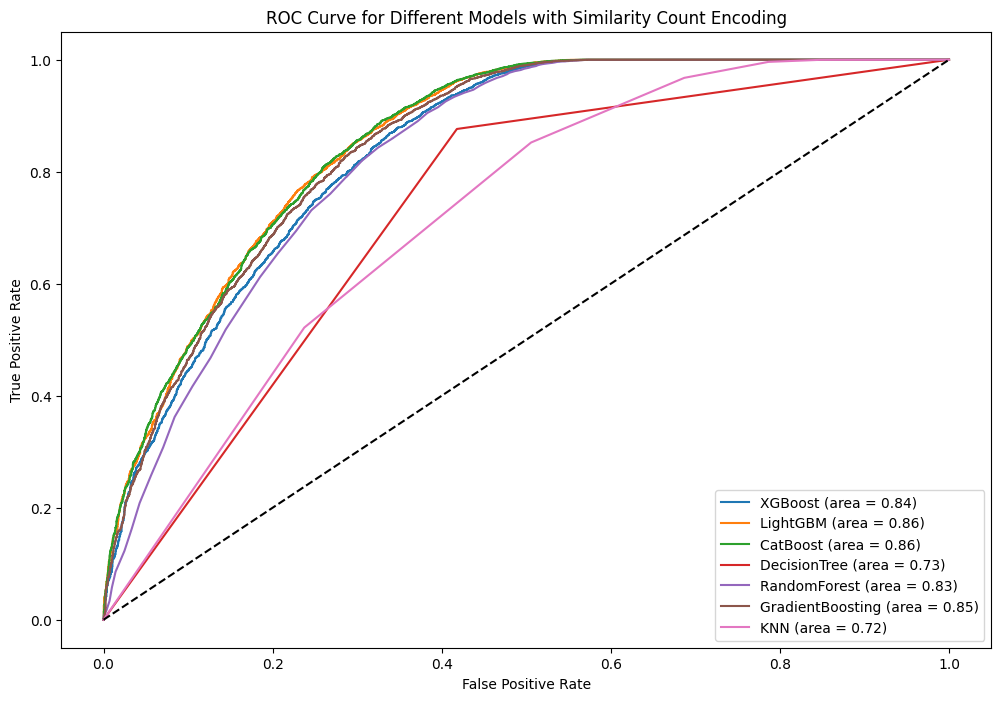


Overall Metrics:
                   Technique             Model  Accuracy  Precision    Recall  \
0  Similarity Count Encoding           XGBoost  0.878621   0.880786  0.977156   
1  Similarity Count Encoding          LightGBM  0.885073   0.878352  0.990295   
2  Similarity Count Encoding          CatBoost  0.886552   0.880000  0.990038   
3  Similarity Count Encoding      DecisionTree  0.812353   0.883004  0.876331   
4  Similarity Count Encoding      RandomForest  0.880503   0.871517  0.993817   
5  Similarity Count Encoding  GradientBoosting  0.883527   0.874991  0.993044   
6  Similarity Count Encoding               KNN  0.825324   0.835273  0.967623   

   F1 Score   ROC AUC  
0  0.926472  0.841044  
1  0.930970  0.857607  
2  0.931781  0.857917  
3  0.879655  0.729201  
4  0.928657  0.830285  
5  0.930287  0.850171  
6  0.896590  0.722245  


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import xgboost as xgb
from category_encoders import CountEncoder
from dirty_cat import SimilarityEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt

class SimilarityCountEncoder:
    def __init__(self):
        self.count_encoder = CountEncoder(normalize=True)
        self.similarity_encoder = SimilarityEncoder()

    def fit(self, X, y=None):
        # Apply count encoding
        X_count_encoded = self.count_encoder.fit_transform(X)

        # Convert count-encoded data back to strings
        X_count_encoded_str = X_count_encoded.astype(str)

        # Fit similarity encoder on count-encoded data
        self.similarity_encoder.fit(X_count_encoded_str)

        return self

    def transform(self, X):
        # Apply count encoding
        X_count_encoded = self.count_encoder.transform(X)

        # Convert count-encoded data back to strings
        X_count_encoded_str = X_count_encoded.astype(str)

        # Apply similarity encoding to count-encoded data
        X_similarity_count_encoded = self.similarity_encoder.transform(X_count_encoded_str)

        return X_similarity_count_encoded

    def fit_transform(self, X, y=None):
        # Fit and transform the data
        self.fit(X)
        return self.transform(X)

# Assuming df, X_train, X_test, y_train, y_test are already defined
# Split the data into train, validation, and test sets
# Assuming you have already split your data into X_train, X_val, X_test, y_train, y_val, y_test

# Apply Similarity Count Encoding
similarity_count_encoder = SimilarityCountEncoder()
X_train_encoded = similarity_count_encoder.fit_transform(X_train)
X_val_encoded = similarity_count_encoder.transform(X_val)
X_test_encoded = similarity_count_encoder.transform(X_test)

# Create a DataFrame to store model evaluation results
results_df = pd.DataFrame(columns=['Technique', 'Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

# Build and Train models using Similarity Count Encoding
models = {
    'XGBoost': xgb.XGBClassifier(max_depth=10, random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Plot settings
plt.figure(figsize=(12, 8))

# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train_encoded, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_encoded)
    y_pred_proba = model.predict_proba(X_test_encoded)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Append the results to the DataFrame
    results_df = pd.concat([results_df, pd.DataFrame([{
        'Technique': 'Similarity Count Encoding',
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }])], ignore_index=True)

    # Print model metrics
    print(f"Similarity Count Encoding + {model_name} Metrics:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1 Score: {f1}")
    print(f"  ROC AUC: {roc_auc}\n")

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (area = {roc_auc:.2f})')

# Plot ROC curve for all models
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models with Similarity Count Encoding')
plt.legend(loc='lower right')
plt.show()

# Print overall results
print("\nOverall Metrics:")
print(results_df)

# Save results to a CSV file
results_df.to_csv('similarity_count_encoding_results.csv', index=False)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
from category_encoders import CountEncoder
from dirty_cat import SimilarityEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

class SimilarityCountEncoder:
    def __init__(self):
        self.count_encoder = CountEncoder(normalize=True)
        self.similarity_encoder = SimilarityEncoder(similarity='ngram')

    def fit(self, X, y=None):
        # Apply count encoding
        X_count_encoded = self.count_encoder.fit_transform(X)

        # Convert count-encoded data back to strings
        X_count_encoded_str = X_count_encoded.astype(str)

        # Fit similarity encoder on count-encoded data
        self.similarity_encoder.fit(X_count_encoded_str)

        return self

    def transform(self, X):
        # Apply count encoding
        X_count_encoded = self.count_encoder.transform(X)

        # Convert count-encoded data back to strings
        X_count_encoded_str = X_count_encoded.astype(str)

        # Apply similarity encoding to count-encoded data
        X_similarity_count_encoded = self.similarity_encoder.transform(X_count_encoded_str)

        return X_similarity_count_encoded

    def fit_transform(self, X, y=None):
        # Fit and transform the data
        self.fit(X)
        return self.transform(X)

# Assuming df, X_train, X_test, y_train, y_test are already defined
# Split the data into train, validation, and test sets
# Assuming you have already split your data into X_train, X_val, X_test, y_train, y_val, y_test

# Apply Similarity Count Encoding
similarity_count_encoder = SimilarityCountEncoder()
X_train_encoded = similarity_count_encoder.fit_transform(X_train)
X_val_encoded = similarity_count_encoder.transform(X_val)
X_test_encoded = similarity_count_encoder.transform(X_test)

# Create a DataFrame to store model evaluation results
results_df = pd.DataFrame(columns=['Technique', 'Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Build and Train models using Similarity Count Encoding
models = {
    'XGBoost': xgb.XGBClassifier(max_depth=10, random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train_encoded, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_encoded)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append the results to the DataFrame
    results_df = results_df.append({
        'Technique': 'Similarity Count Encoding',
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }, ignore_index=True)

    print(f"Similarity Count Encoding + {model_name} Metrics:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1 Score: {f1}\n")

# Hybrid model combining XGBoost and LightGBM
xgb_model = xgb.XGBClassifier(max_depth=10, random_state=42)
lgbm_model = LGBMClassifier(random_state=42)

# Train both models
xgb_model.fit(X_train_encoded, y_train)
lgbm_model.fit(X_train_encoded, y_train)

# Make predictions using both models
xgb_pred = xgb_model.predict_proba(X_test_encoded)
lgbm_pred = lgbm_model.predict_proba(X_test_encoded)

# Combine predictions (simple averaging)
hybrid_pred = (xgb_pred + lgbm_pred) / 2

# Convert probabilities to class labels
hybrid_pred_class = np.argmax(hybrid_pred, axis=1)

# Calculate metrics for the hybrid model
accuracy = accuracy_score(y_test, hybrid_pred_class)
precision = precision_score(y_test, hybrid_pred_class)
recall = recall_score(y_test, hybrid_pred_class)
f1 = f1_score(y_test, hybrid_pred_class)

# Append the results to the DataFrame
results_df = results_df.append({
    'Technique': 'Similarity Count Encoding',
    'Model': 'Hybrid (XGBoost + LightGBM)',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}, ignore_index=True)

print(f"Similarity Count Encoding + Hybrid (XGBoost + LightGBM) Metrics:")
print(f"  Accuracy: {accuracy}")
print(f"  Precision: {precision}")
print(f"  Recall: {recall}")
print(f"  F1 Score: {f1}\n")

# Print overall results
print("\nOverall Metrics:")
print(results_df)

# Save results to a CSV file
results_df.to_csv('similarity_count_encoding_results.csv', index=False)


<ipython-input-16-0120d116f84e>:17: UserWarning: The "similarity" argument is deprecated since dirty_cat 0.3, and will be removed in 0.5.The n-gram similarity is the only one currently supported. 
  self.similarity_encoder = SimilarityEncoder(similarity='ngram')
<ipython-input-16-0120d116f84e>:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Similarity Count Encoding + XGBoost Metrics:
  Accuracy: 0.8772766987028698
  Precision: 0.8781981702589549
  Recall: 0.9779830771887411
  F1 Score: 0.9254084967320261

[LightGBM] [Info] Number of positive: 92689, number of negative: 26335
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 6.665690 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 53938
[LightGBM] [Info] Number of data points in the train set: 119024, number of used features: 2034
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.778742 -> initscore=1.258351
[LightGBM] [Info] Start training from score 1.258351


<ipython-input-16-0120d116f84e>:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Similarity Count Encoding + LightGBM Metrics:
  Accuracy: 0.8826534041266214
  Precision: 0.8760513840036703
  Recall: 0.9892073907787947
  F1 Score: 0.9291970802919708



<ipython-input-16-0120d116f84e>:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Similarity Count Encoding + CatBoost Metrics:
  Accuracy: 0.8827878217622152
  Precision: 0.8769926425505825
  Recall: 0.9879986185460197
  F1 Score: 0.929192042224929



<ipython-input-16-0120d116f84e>:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Similarity Count Encoding + DecisionTree Metrics:
  Accuracy: 0.8070434841051146
  Precision: 0.8800279207748015
  Recall: 0.8708340528406148
  F1 Score: 0.8754068480666579



KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Function to calculate Weight of Evidence (WoE)
def calculate_woe(df, feature, target):
    event_total = df[target].sum()
    non_event_total = df.shape[0] - event_total

    woe_dict = {}
    for category in df[feature].unique():
        event_count = df[df[feature] == category][target].sum()
        non_event_count = df[df[feature] == category].shape[0] - event_count

        if event_count == 0:
            event_count += 0.5
        if non_event_count == 0:
            non_event_count += 0.5

        woe = np.log(non_event_count / non_event_total / (event_count / event_total))
        woe_dict[category] = woe

    return woe_dict

# Encode categorical variables using WoE
def encode_woe(df, target):
    encoded_df = df.copy()
    for feature in df.columns:
        if df[feature].dtype == 'object':
            woe_dict = calculate_woe(df, feature, target)
            encoded_df[feature] = df[feature].map(woe_dict)
    return encoded_df

# Assuming df, X_train, X_test, y_train, y_test are already defined

# Encode categorical variables using WoE
encoded_df = encode_woe(df, 'State_of_TB')

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(encoded_df.drop('State_of_TB', axis=1), df['State_of_TB'], test_size=0.2, random_state=42)

# Create a DataFrame to store model evaluation results
results_df = pd.DataFrame(columns=['Technique', 'Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Build and Train models using WoE encoding
models = {
    'XGBoost': xgb.XGBClassifier(max_depth=10, random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append the results to the DataFrame
    results_df = results_df.append({
        'Technique': 'Weight of Evidence (WoE) Encoding',
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }, ignore_index=True)

    print(f"Weight of Evidence (WoE) Encoding + {model_name} Metrics:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1 Score: {f1}\n")

# Hybrid model combining XGBoost and LightGBM
xgb_model = xgb.XGBClassifier(max_depth=10, random_state=42)
lgbm_model = LGBMClassifier(random_state=42)

# Train both models
xgb_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)

# Make predictions using both models
xgb_pred = xgb_model.predict_proba(X_test)
lgbm_pred = lgbm_model.predict_proba(X_test)

# Combine predictions (simple averaging)
hybrid_pred = (xgb_pred + lgbm_pred) / 2

# Convert probabilities to class labels
hybrid_pred_class = np.argmax(hybrid_pred, axis=1)

# Calculate metrics for the hybrid model
accuracy = accuracy_score(y_test, hybrid_pred_class)
precision = precision_score(y_test, hybrid_pred_class)
recall = recall_score(y_test, hybrid_pred_class)
f1 = f1_score(y_test, hybrid_pred_class)

# Append the results to the DataFrame
results_df = results_df.append({
    'Technique': 'Weight of Evidence (WoE) Encoding',
    'Model': 'Hybrid (XGBoost + LightGBM)',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}, ignore_index=True)

print(f"Weight of Evidence (WoE) Encoding + Hybrid (XGBoost + LightGBM) Metrics:")
print(f"  Accuracy: {accuracy}")
print(f"  Precision: {precision}")
print(f"  Recall: {recall}")
print(f"  F1 Score: {f1}\n")

# Print overall results
print("\nOverall Metrics:")
print(results_df)

# Save results to a CSV file
results_df.to_csv('woe_encoding_results.csv', index=False)


<ipython-input-17-53bb57857689>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Weight of Evidence (WoE) Encoding + XGBoost Metrics:
  Accuracy: 0.8848002150754445
  Precision: 0.8873189685623455
  Recall: 0.9759551046837902
  F1 Score: 0.9295288216429569

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 92689, number of negative: 26335
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.056933 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1702
[LightGBM] [Info] Number of data points in the train set: 119024, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.778742 -> initscore=1.258351
[LightGBM] [Info] Start training from score 1.258351


<ipython-input-17-53bb57857689>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Weight of Evidence (WoE) Encoding + LightGBM Metrics:
  Accuracy: 0.8878919245891723
  Precision: 0.8842978410015893
  Recall: 0.9848478307791928
  F1 Score: 0.9318683114124664

Weight of Evidence (WoE) Encoding + CatBoost Metrics:
  Accuracy: 0.8889673018113385
  Precision: 0.8862955615202085
  Recall: 0.9835527735808332
  F1 Score: 0.9323948273039776



<ipython-input-17-53bb57857689>:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from category_encoders import CountEncoder
from dirty_cat import SimilarityEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

class SimilarityCountEncoder:
    def __init__(self):
        self.count_encoder = CountEncoder(normalize=True)
        self.similarity_encoder = SimilarityEncoder(similarity='ngram')

    def fit(self, X, y=None):
        # Apply count encoding
        X_count_encoded = self.count_encoder.fit_transform(X)

        # Convert count-encoded data back to strings
        X_count_encoded_str = X_count_encoded.astype(str)

        # Fit similarity encoder on count-encoded data
        self.similarity_encoder.fit(X_count_encoded_str)

        return self

    def transform(self, X):
        # Apply count encoding
        X_count_encoded = self.count_encoder.transform(X)

        # Convert count-encoded data back to strings
        X_count_encoded_str = X_count_encoded.astype(str)

        # Apply similarity encoding to count-encoded data
        X_similarity_count_encoded = self.similarity_encoder.transform(X_count_encoded_str)

        return X_similarity_count_encoded

    def fit_transform(self, X, y=None):
        # Fit and transform the data
        self.fit(X)
        return self.transform(X)

# Assuming df, X_train, X_test, y_train, y_test are already defined
# Split the data into train, validation, and test sets
# Assuming you have already split your data into X_train, X_val, X_test, y_train, y_val, y_test

# Apply Similarity Count Encoding
similarity_count_encoder = SimilarityCountEncoder()
X_train_encoded = similarity_count_encoder.fit_transform(X_train)
X_val_encoded = similarity_count_encoder.transform(X_val)
X_test_encoded = similarity_count_encoder.transform(X_test)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_encoded, y_train)

# Create a DataFrame to store model evaluation results
results_df = pd.DataFrame(columns=['Technique', 'Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Build and Train models using Similarity Count Encoding
models = {
    'XGBoost': xgb.XGBClassifier(max_depth=10, random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)

    # Make predictions on the test set
    y_pred = model.predict(X_test_encoded)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append the results to the DataFrame
    results_df = results_df.append({
        'Technique': 'Similarity Count Encoding + SMOTE',
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }, ignore_index=True)

    print(f"Similarity Count Encoding + SMOTE + {model_name} Metrics:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1 Score: {f1}\n")

# Hybrid model combining XGBoost and LightGBM
xgb_model = xgb.XGBClassifier(max_depth=10, random_state=42)
lgbm_model = LGBMClassifier(random_state=42)

# Train both models
xgb_model.fit(X_train_balanced, y_train_balanced)
lgbm_model.fit(X_train_balanced, y_train_balanced)

# Make predictions using both models
xgb_pred = xgb_model.predict_proba(X_test_encoded)
lgbm_pred = lgbm_model.predict_proba(X_test_encoded)

# Combine predictions (simple averaging)
hybrid_pred = (xgb_pred + lgbm_pred) / 2

# Convert probabilities to class labels
hybrid_pred_class = np.argmax(hybrid_pred, axis=1)

# Calculate metrics for the hybrid model
accuracy = accuracy_score(y_test, hybrid_pred_class)
precision = precision_score(y_test, hybrid_pred_class)
recall = recall_score(y_test, hybrid_pred_class)
f1 = f1_score(y_test, hybrid_pred_class)

# Append the results to the DataFrame
results_df = results_df.append({
    'Technique': 'Similarity Count Encoding + SMOTE',
    'Model': 'Hybrid (XGBoost + LightGBM)',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}, ignore_index=True)

print(f"Similarity Count Encoding + SMOTE + Hybrid (XGBoost + LightGBM) Metrics:")
print(f"  Accuracy: {accuracy}")
print(f"  Precision: {precision}")
print(f"  Recall: {recall}")
print(f"  F1 Score: {f1}\n")

# Print overall results
print("\nOverall Metrics:")
print(results_df)

# Save results to a CSV file
results_df.to_csv('similarity_count_encoding_results_with_smote_and_hybrid.csv', index=False)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import xgboost as xgb
from category_encoders import CountEncoder
from dirty_cat import SimilarityEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

class SimilarityCountEncoder:
    def __init__(self):
        self.count_encoder = CountEncoder(normalize=True)
        self.similarity_encoder = SimilarityEncoder(similarity='ngram')

    def fit(self, X, y=None):
        # Apply count encoding
        X_count_encoded = self.count_encoder.fit_transform(X)

        # Convert count-encoded data back to strings
        X_count_encoded_str = X_count_encoded.astype(str)

        # Fit similarity encoder on count-encoded data
        self.similarity_encoder.fit(X_count_encoded_str)

        return self

    def transform(self, X):
        # Apply count encoding
        X_count_encoded = self.count_encoder.transform(X)

        # Convert count-encoded data back to strings
        X_count_encoded_str = X_count_encoded.astype(str)

        # Apply similarity encoding to count-encoded data
        X_similarity_count_encoded = self.similarity_encoder.transform(X_count_encoded_str)

        return X_similarity_count_encoded

    def fit_transform(self, X, y=None):
        # Fit and transform the data
        self.fit(X)
        return self.transform(X)

# Assuming df, X_train, X_test, y_train, y_test are already defined
# Split the data into train, validation, and test sets
# Assuming you have already split your data into X_train, X_val, X_test, y_train, y_val, y_test

# Apply Similarity Count Encoding
similarity_count_encoder = SimilarityCountEncoder()
X_train_encoded = similarity_count_encoder.fit_transform(X_train)
X_val_encoded = similarity_count_encoder.transform(X_val)
X_test_encoded = similarity_count_encoder.transform(X_test)

# Apply random oversampling to balance the dataset
random_oversampler = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = random_oversampler.fit_resample(X_train_encoded, y_train)

# Create a DataFrame to store model evaluation results
results_df = pd.DataFrame(columns=['Technique', 'Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Build and Train models using Similarity Count Encoding
models = {
    'XGBoost': xgb.XGBClassifier(max_depth=10, random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)

    # Make predictions on the test set
    y_pred = model.predict(X_test_encoded)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append the results to the DataFrame
    results_df = results_df.append({
        'Technique': 'Similarity Count Encoding + Random Oversampling',
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }, ignore_index=True)

    print(f"Similarity Count Encoding + Random Oversampling + {model_name} Metrics:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1 Score: {f1}\n")

# Hybrid model combining XGBoost and LightGBM
xgb_model = xgb.XGBClassifier(max_depth=10, random_state=42)
lgbm_model = LGBMClassifier(random_state=42)

# Train both models
xgb_model.fit(X_train_balanced, y_train_balanced)
lgbm_model.fit(X_train_balanced, y_train_balanced)

# Make predictions using both models
xgb_pred = xgb_model.predict_proba(X_test_encoded)
lgbm_pred = lgbm_model.predict_proba(X_test_encoded)

# Combine predictions (simple averaging)
hybrid_pred = (xgb_pred + lgbm_pred) / 2

# Convert probabilities to class labels
hybrid_pred_class = np.argmax(hybrid_pred, axis=1)

# Calculate metrics for the hybrid model
accuracy = accuracy_score(y_test, hybrid_pred_class)
precision = precision_score(y_test, hybrid_pred_class)
recall = recall_score(y_test, hybrid_pred_class)
f1 = f1_score(y_test, hybrid_pred_class)

# Append the results to the DataFrame
results_df = results_df.append({
    'Technique': 'Similarity Count Encoding + Random Oversampling',
    'Model': 'Hybrid (XGBoost + LightGBM)',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}, ignore_index=True)

print(f"Similarity Count Encoding + Random Oversampling + Hybrid (XGBoost + LightGBM) Metrics:")
print(f"  Accuracy: {accuracy}")
print(f"  Precision: {precision}")
print(f"  Recall: {recall}")
print(f"  F1 Score: {f1}\n")

# Print overall results
print("\nOverall Metrics:")
print(results_df)

# Save results to a CSV file
results_df.to_csv('similarity_count_encoding_results_with_random_oversampling_and_hybrid.csv', index=False)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
from category_encoders import CountEncoder
from dirty_cat import SimilarityEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

class SimilarityCountEncoder:
    def __init__(self):
        self.count_encoder = CountEncoder(normalize=True)
        self.similarity_encoder = SimilarityEncoder(similarity='ngram')

    def fit(self, X, y=None):
        # Apply count encoding
        X_count_encoded = self.count_encoder.fit_transform(X)

        # Convert count-encoded data back to strings
        X_count_encoded_str = X_count_encoded.astype(str)

        # Fit similarity encoder on count-encoded data
        self.similarity_encoder.fit(X_count_encoded_str)

        return self

    def transform(self, X):
        # Apply count encoding
        X_count_encoded = self.count_encoder.transform(X)

        # Convert count-encoded data back to strings
        X_count_encoded_str = X_count_encoded.astype(str)

        # Apply similarity encoding to count-encoded data
        X_similarity_count_encoded = self.similarity_encoder.transform(X_count_encoded_str)

        return X_similarity_count_encoded

    def fit_transform(self, X, y=None):
        # Fit and transform the data
        self.fit(X)
        return self.transform(X)

# Assuming df, X_train, X_test, y_train, y_test are already defined
# Split the data into train, validation, and test sets
# Assuming you have already split your data into X_train, X_val, X_test, y_train, y_val, y_test

# Apply Similarity Count Encoding
similarity_count_encoder = SimilarityCountEncoder()
X_train_encoded = similarity_count_encoder.fit_transform(X_train)
X_val_encoded = similarity_count_encoder.transform(X_val)
X_test_encoded = similarity_count_encoder.transform(X_test)

# Perform random oversampling with replacement
unique, counts = np.unique(y_train, return_counts=True)
max_count = np.max(counts)
X_train_balanced = []
y_train_balanced = []
for label in unique:
    label_indices = np.where(y_train == label)[0]
    label_count = len(label_indices)
    if label_count < max_count:
        chosen_indices = np.random.choice(label_indices, size=max_count-label_count, replace=True)
        X_train_balanced.extend(X_train_encoded[chosen_indices])
        y_train_balanced.extend([label] * (max_count-label_count))
X_train_balanced = np.concatenate([X_train_encoded, np.array(X_train_balanced)])
y_train_balanced = np.concatenate([y_train, np.array(y_train_balanced)])

# Create a DataFrame to store model evaluation results
results_df = pd.DataFrame(columns=['Technique', 'Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Build and Train models using Similarity Count Encoding
models = {
    'XGBoost': xgb.XGBClassifier(max_depth=10, random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)

    # Make predictions on the test set
    y_pred = model.predict(X_test_encoded)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append the results to the DataFrame
    results_df = results_df.append({
        'Technique': 'Similarity Count Encoding + Random Oversampling with Replacement',
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }, ignore_index=True)

    print(f"Similarity Count Encoding + Random Oversampling with Replacement + {model_name} Metrics:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1 Score: {f1}\n")

# Print overall results
print("\nOverall Metrics:")
print(results_df)

# Save results to a CSV file
results_df.to_csv('similarity_count_encoding_results_with_random_oversampling_replacement.csv', index=False)
